In [2]:
# Imports...

import getpass
import h5py
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.markers as markers
import os
import json
import numpy as np
import pandas as pd
import pickle

In [3]:
# Change presentation settings

%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (8.0, 5.0)
matplotlib.rcParams["xtick.labelsize"] = 12
matplotlib.rcParams["ytick.labelsize"] = 12
matplotlib.rcParams["axes.spines.left"] = True
matplotlib.rcParams["axes.spines.bottom"] = True
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["legend.fontsize"] = 14
matplotlib.rcParams["axes.titlesize"] = 14

color_palette = {"Indigo": {
                    50: "#E8EAF6",
                    100: "#C5CAE9",
                    200: "#9FA8DA",
                    300: "#7986CB",
                    400: "#5C6BC0",
                    500: "#3F51B5",
                    600: "#3949AB",
                    700: "#303F9F",
                    800: "#283593",
                    900: "#1A237E"},
                 "Teal": {      
                    50: "#E0F2F1",
                    100: "#B2DFDB",
                    200: "#80CBC4",
                    300: "#4DB6AC",
                    400: "#26A69A",
                    500: "#009688",
                    600: "#00897B",
                    700: "#00796B",
                    800: "#00695C",
                    900: "#004D40"},
                 "Orange": {      
                    50: "#E0F2F1",
                    100: "#B2DFDB",
                    200: "#80CBC4",
                    300: "#4DB6AC",
                    400: "#26A69A",
                    500: "#009688",
                    600: "#00897B",
                    700: "#00796B",
                    800: "#00695C",
                    900: "#004D40"}
                }

line_styles = [(0, ()), (0, (1, 3)), (0, (3, 2))]

# Size of plots
plt.rcParams['figure.figsize'] = [20, 10]

In [4]:
# Get permission to access EOS (Insert your NICE password)

os.system("echo %s | kinit" % getpass.getpass())

········


0

In [5]:
PDs  = {1: 'BTagCSV',
        2: 'BTagMu',
        3: 'Charmonium',
        4: 'DisplacedJet',
        5: 'DoubleEG',
        6: 'DoubleMuon',
        7: 'DoubleMuonLowMass',
        8: 'FSQJets',
        9: 'HighMultiplicityEOF',
        10: 'HTMHT',
        11: 'JetHT',
        12: 'MET',
        13: 'MinimumBias',
        14: 'MuonEG',
        15: 'MuOnia',
        16: 'NoBPTX',
        17: 'SingleElectron',
        18: 'SingleMuon',
        19: 'SinglePhoton',
        20: 'Tau',
        21: 'ZeroBias'}

# Select PD
nPD = 11

In [6]:
legend = [{"name": 'pf_jets', "start": 0, "end": 776, "color": color_palette["Indigo"][100]},
          {"name": 'cal_jet_mets', "start": 777, "end": 944, "color": color_palette["Indigo"][300]},
          {"name": 'pho', "start": 945, "end": 1280, "color": color_palette["Indigo"][500]},
          {"name": 'muons', "start": 1281, "end": 1784, "color": color_palette["Indigo"][700]},
          {"name": 'pf_jets2', "start": 1785, "end": 1889, "color": color_palette["Indigo"][900]},
          {"name": 'pf_mets', "start": 1890, "end": 1917, "color": color_palette["Indigo"][200]},
          {"name": 'nvtx', "start": 1918, "end": 1924, "color": color_palette["Indigo"][400]},
          {"name": 'cal_jet_mets2', "start": 1925, "end": 2036, "color": color_palette["Indigo"][600]},
          {"name": 'sc', "start": 2037, "end": 2127, "color": color_palette["Indigo"][800]},
          {"name": 'cc', "start": 2128, "end": 2169, "color": color_palette["Orange"][100]},
          {"name": 'pho2', "start": 2170, "end": 2365, "color": color_palette["Orange"][300]},
          {"name": 'muons2', "start": 2366, "end": 2491, "color": color_palette["Orange"][500]},
          {"name": 'ebs', "start": 2492, "end": 2701, "color": color_palette["Orange"][700]},
          {"name": 'hbhef', "start": 2702, "end": 2764, "color": color_palette["Orange"][900]},
          {"name": 'presh', "start": 2765, "end": 2806, "color": color_palette["Orange"][400]}]

In [7]:
data_directory = "/eos/cms/store/user/fsiroky/consistentlumih5/"
label_file = "./JetHT.json"

In [8]:
def get_file_list(directory, pds, npd, typeof, extension):
    files = []
    parts = ["C", "D", "E", "F", "G", "H"]
    for p in parts:
        files.append("%s%s_%s_%s%s" % (directory, pds[npd], p, typeof, extension))
    return files

files = get_file_list(data_directory, PDs, nPD, "background", ".h5")
files = files + get_file_list(data_directory, PDs, nPD, "signal", ".h5")

In [30]:
# Load good and bad jets

def get_data(files):
    readout = np.empty([0,2813])
    
    for file in files:
        jet = file.split("/")[-1][:-3]
        print("Reading: %s" % jet)
        try:
            h5file = h5py.File(file, "r")
            readout = np.concatenate((readout, h5file[jet][:]), axis=0)
        except OSError as error:
            print("This Primary Dataset doesn't have %s. %s" % (jet, error))
            continue

    return readout

data = pd.DataFrame(get_data(files))

Reading: JetHT_C_background
Reading: JetHT_D_background
Reading: JetHT_E_background
Reading: JetHT_F_background
Reading: JetHT_G_background
Reading: JetHT_H_background
Reading: JetHT_C_signal
Reading: JetHT_D_signal
Reading: JetHT_E_signal
Reading: JetHT_F_signal
Reading: JetHT_G_signal
Reading: JetHT_H_signal


In [11]:
data.shape

(163684, 2813)

In [16]:
# Feature description

feature_names = ['qPFJetPt', 'qPFJetEta', 'qPFJetPhi', 'qPFJet0Pt', 'qPFJet1Pt', 'qPFJet2Pt', 'qPFJet3Pt', 'qPFJet4Pt', 'qPFJet5Pt', 'qPFJet0Eta', 'qPFJet1Eta', 'qPFJet2Eta', 'qPFJet3Eta', 'qPFJet4Eta', 'qPFJet5Eta', 'qPFJet0Phi', 'qPFJet1Phi', 'qPFJet2Phi', 'qPFJet3Phi', 'qPFJet4Phi', 'qPFJet5Phi', 'qPFJet4CHS0Pt', 'qPFJet4CHS1Pt', 'qPFJet4CHS2Pt', 'qPFJet4CHS3Pt', 'qPFJet4CHS4Pt', 'qPFJet4CHS5Pt', 'qPFJet4CHS0Eta', 'qPFJet4CHS1Eta', 'qPFJet4CHS2Eta', 'qPFJet4CHS3Eta', 'qPFJet4CHS4Eta', 'qPFJet4CHS5Eta', 'qPFJet4CHS0Phi', 'qPFJet4CHS1Phi', 'qPFJet4CHS2Phi', 'qPFJet4CHS3Phi', 'qPFJet4CHS4Phi', 'qPFJet4CHS5Phi', 'qPFJet8CHS0Pt', 'qPFJet8CHS1Pt', 'qPFJet8CHS2Pt', 'qPFJet8CHS3Pt', 'qPFJet8CHS4Pt', 'qPFJet8CHS5Pt', 'qPFJet8CHS0Eta', 'qPFJet8CHS1Eta', 'qPFJet8CHS2Eta', 'qPFJet8CHS3Eta', 'qPFJet8CHS4Eta', 'qPFJet8CHS5Eta', 'qPFJet8CHS0Phi', 'qPFJet8CHS1Phi', 'qPFJet8CHS2Phi', 'qPFJet8CHS3Phi', 'qPFJet8CHS4Phi', 'qPFJet8CHS5Phi', 'qPFJetEI0Pt', 'qPFJetEI1Pt', 'qPFJetEI2Pt', 'qPFJetEI3Pt', 'qPFJetEI4Pt', 'qPFJetEI5Pt', 'qPFJetEI0Eta', 'qPFJetEI1Eta', 'qPFJetEI2Eta', 'qPFJetEI3Eta', 'qPFJetEI4Eta', 'qPFJetEI5Eta', 'qPFJetEI0Phi', 'qPFJetEI1Phi', 'qPFJetEI2Phi', 'qPFJetEI3Phi', 'qPFJetEI4Phi', 'qPFJetEI5Phi', 'qPFJet8CHSSD0Pt', 'qPFJet8CHSSD1Pt', 'qPFJet8CHSSD2Pt', 'qPFJet8CHSSD3Pt', 'qPFJet8CHSSD4Pt', 'qPFJet8CHSSD5Pt', 'qPFJet8CHSSD0Eta', 'qPFJet8CHSSD1Eta', 'qPFJet8CHSSD2Eta', 'qPFJet8CHSSD3Eta', 'qPFJet8CHSSD4Eta', 'qPFJet8CHSSD5Eta', 'qPFJet8CHSSD0Phi', 'qPFJet8CHSSD1Phi', 'qPFJet8CHSSD2Phi', 'qPFJet8CHSSD3Phi', 'qPFJet8CHSSD4Phi', 'qPFJet8CHSSD5Phi', 'qPFJetTopCHS0Pt', 'qPFJetTopCHS1Pt', 'qPFJetTopCHS2Pt', 'qPFJetTopCHS3Pt', 'qPFJetTopCHS4Pt', 'qPFJetTopCHS5Pt', 'qPFJetTopCHS0Eta', 'qPFJetTopCHS1Eta', 'qPFJetTopCHS2Eta', 'qPFJetTopCHS3Eta', 'qPFJetTopCHS4Eta', 'qPFJetTopCHS5Eta', 'qPFJetTopCHS0Phi', 'qPFJetTopCHS1Phi', 'qPFJetTopCHS2Phi', 'qPFJetTopCHS3Phi', 'qPFJetTopCHS4Phi', 'qPFJetTopCHS5Phi', 'qCalJet0Pt', 'qCalJet1Pt', 'qCalJet2Pt', 'qCalJet3Pt', 'qCalJet4Pt', 'qCalJet5Pt', 'qCalJet0Eta', 'qCalJet1Eta', 'qCalJet2Eta', 'qCalJet3Eta', 'qCalJet4Eta', 'qCalJet5Eta', 'qCalJet0Phi', 'qCalJet1Phi', 'qCalJet2Phi', 'qCalJet3Phi', 'qCalJet4Phi', 'qCalJet5Phi', 'qCalJet0En', 'qCalJet1En', 'qCalJet2En', 'qCalJet3En', 'qCalJet4En', 'qCalJet5En', 'qPho0Pt', 'qPho1Pt', 'qPho2Pt', 'qPho3Pt', 'qPho4Pt', 'qPho5Pt', 'qPho0Eta', 'qPho1Eta', 'qPho2Eta', 'qPho3Eta', 'qPho4Eta', 'qPho5Eta', 'qPho0Phi', 'qPho1Phi', 'qPho2Phi', 'qPho3Phi', 'qPho4Phi', 'qPho5Phi', 'qPho0En', 'qPho1En', 'qPho2En', 'qPho3En', 'qPho4En', 'qPho5En', 'qgedPho0Pt', 'qgedPho1Pt', 'qgedPho2Pt', 'qgedPho3Pt', 'qgedPho4Pt', 'qgedPho5Pt', 'qgedPho0Eta', 'qgedPho1Eta', 'qgedPho2Eta', 'qgedPho3Eta', 'qgedPho4Eta', 'qgedPho5Eta', 'qgedPho0Phi', 'qgedPho1Phi', 'qgedPho2Phi', 'qgedPho3Phi', 'qgedPho4Phi', 'qgedPho5Phi', 'qgedPho0En', 'qgedPho1En', 'qgedPho2En', 'qgedPho3En', 'qgedPho4En', 'qgedPho5En', 'qMu0Pt', 'qMu1Pt', 'qMu2Pt', 'qMu3Pt', 'qMu4Pt', 'qMu5Pt', 'qMu0Eta', 'qMu1Eta', 'qMu2Eta', 'qMu3Eta', 'qMu4Eta', 'qMu5Eta', 'qMu0Phi', 'qMu1Phi', 'qMu2Phi', 'qMu3Phi', 'qMu4Phi', 'qMu5Phi', 'qMu0En', 'qMu1En', 'qMu2En', 'qMu3En', 'qMu4En', 'qMu5En', 'qMuCosm0Pt', 'qMuCosm1Pt', 'qMuCosm2Pt', 'qMuCosm3Pt', 'qMuCosm4Pt', 'qMuCosm5Pt', 'qMuCosm0Eta', 'qMuCosm1Eta', 'qMuCosm2Eta', 'qMuCosm3Eta', 'qMuCosm4Eta', 'qMuCosm5Eta', 'qMuCosm0Phi', 'qMuCosm1Phi', 'qMuCosm2Phi', 'qMuCosm3Phi', 'qMuCosm4Phi', 'qMuCosm5Phi', 'qMuCosm0En', 'qMuCosm1En', 'qMuCosm2En', 'qMuCosm3En', 'qMuCosm4En', 'qMuCosm5En', 'qMuCosmLeg0Pt', 'qMuCosmLeg1Pt', 'qMuCosmLeg2Pt', 'qMuCosmLeg3Pt', 'qMuCosmLeg4Pt', 'qMuCosmLeg5Pt', 'qMuCosmLeg0Eta', 'qMuCosmLeg1Eta', 'qMuCosmLeg2Eta', 'qMuCosmLeg3Eta', 'qMuCosmLeg4Eta', 'qMuCosmLeg5Eta', 'qMuCosmLeg0Phi', 'qMuCosmLeg1Phi', 'qMuCosmLeg2Phi', 'qMuCosmLeg3Phi', 'qMuCosmLeg4Phi', 'qMuCosmLeg5Phi', 'qMuCosmLeg0En', 'qMuCosmLeg1En', 'qMuCosmLeg2En', 'qMuCosmLeg3En', 'qMuCosmLeg4En', 'qMuCosmLeg5En', 'qPFJet4CHSPt', 'qPFJet4CHSEta', 'qPFJet4CHSPhi', 'qPFJet8CHSPt', 'qPFJet8CHSEta', 'qPFJet8CHSPhi', 'qPFJetEIPt', 'qPFJetEIEta', 'qPFJetEIPhi', 'qPFJet8CHSSDPt', 'qPFJet8CHSSDEta', 'qPFJet8CHSSDPhi', 'qPFJetTopCHSPt', 'qPFJetTopCHSEta', 'qPFJetTopCHSPhi', 'qPFChMetPt', 'qPFChMetPhi', 'qPFMetPt', 'qPFMetPhi', 'qNVtx', 'qCalJetPt', 'qCalJetEta', 'qCalJetPhi', 'qCalJetEn', 'qCalMETPt', 'qCalMETPhi', 'qCalMETEn', 'qCalMETBEPt', 'qCalMETBEPhi', 'qCalMETBEEn', 'qCalMETBEFOPt', 'qCalMETBEFOPhi', 'qCalMETBEFOEn', 'qCalMETMPt', 'qCalMETMPhi', 'qCalMETMEn', 'qSCEn', 'qSCEta', 'qSCPhi', 'qSCEtaWidth', 'qSCPhiWidth', 'qSCEnhfEM', 'qSCEtahfEM', 'qSCPhihfEM', 'qSCEn5x5', 'qSCEta5x5', 'qSCPhi5x5', 'qSCEtaWidth5x5', 'qSCPhiWidth5x5', 'qCCEn', 'qCCEta', 'qCCPhi', 'qCCEn5x5', 'qCCEta5x5', 'qCCPhi5x5', 'qPhoPt', 'qPhoEta', 'qPhoPhi', 'qPhoEn_', 'qPhoe1x5_', 'qPhoe2x5_', 'qPhoe3x3_', 'qPhoe5x5_', 'qPhomaxenxtal_', 'qPhosigmaeta_', 'qPhosigmaIeta_', 'qPhor1x5_', 'qPhor2x5_', 'qPhor9_', 'qgedPhoPt', 'qgedPhoEta', 'qgedPhoPhi', 'qgedPhoEn_', 'qgedPhoe1x5_', 'qgedPhoe2x5_', 'qgedPhoe3x3_', 'qgedPhoe5x5_', 'qgedPhomaxenxtal_', 'qgedPhosigmaeta_', 'qgedPhosigmaIeta_', 'qgedPhor1x5_', 'qgedPhor2x5_', 'qgedPhor9_', 'qMuPt', 'qMuEta', 'qMuPhi', 'qMuEn_', 'qMuCh_', 'qMuChi2_', 'qMuCosmPt', 'qMuCosmEta', 'qMuCosmPhi', 'qMuCosmEn_', 'qMuCosmCh_', 'qMuCosmChi2_', 'qMuCosmLegPt', 'qMuCosmLegEta', 'qMuCosmLegPhi', 'qMuCosmLegEn_', 'qMuCosmLegCh_', 'qMuCosmLegChi2_', 'qSigmaIEta', 'qSigmaIPhi', 'qr9', 'qHadOEm', 'qdrSumPt', 'qdrSumEt', 'qeSCOP', 'qecEn', 'qUNSigmaIEta', 'qUNSigmaIPhi', 'qUNr9', 'qUNHadOEm', 'qUNdrSumPt', 'qUNdrSumEt', 'qUNeSCOP', 'qUNecEn', 'qEBenergy', 'qEBtime', 'qEBchi2', 'qEBiEta', 'qEBiPhi', 'qEEenergy', 'qEEtime', 'qEEchi2', 'qEEix', 'qEEiy', 'qESenergy', 'qEStime', 'qESix', 'qESiy', 'qHBHEenergy', 'qHBHEtime', 'qHBHEauxe', 'qHBHEieta', 'qHBHEiphi', 'qHFenergy', 'qHFtime', 'qHFieta', 'qHFiphi', 'qPreShEn', 'qPreShEta', 'qPreShPhi', 'qPreShYEn', 'qPreShYEta', 'qPreShYPhi']

In [14]:
data["run"] = data[2807].astype(int)
data["lumi"] = data[2808].astype(int)
data["inst_lumi"] = data[2809].astype(float)

In [10]:
# Drop unnecessary meta data
data.drop([2807, 2808, 2809, 2810, 2811, 2812], axis=1, inplace=True)

# Sort by runID and then by lumiID
data = data.sort_values(["run", "lumi"], ascending=[True,True])

# Reset index
data = data.reset_index(drop=True)  

In [11]:
data_orig = data

In [12]:
data.shape

(163684, 2810)

In [13]:
len(data) // 10

16368

In [14]:
data = data.iloc[16368:, :]
data.shape

(147316, 2810)

In [15]:
files_dir_01 = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01/"
files_dir_08 = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split08/"

files_dir = files_dir_01

In [16]:
ae_pred = pickle.load(open(files_dir + "ae_pred.p", "rb"))
ae_pred_no_reg = pickle.load(open(files_dir + "ae_pred_no_reg.p", "rb"))
y_test = pickle.load(open(files_dir + "true_labels.p", "rb"))

y_test = y_test[0]

In [59]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_linear/"

ae_pred_id = pickle.load(open(files_dir + "ae_pred.p", "rb"))

In [60]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_elu/"

ae_pred_elu = pickle.load(open(files_dir + "ae_pred.p", "rb"))

In [68]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_relu/"

ae_pred_relu = pickle.load(open(files_dir + "ae_pred.p", "rb"))

In [20]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_selu/"

ae_pred_selu = pickle.load(open(files_dir + "ae_pred.p", "rb"))

In [64]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_softplus/"

ae_pred_softplus = pickle.load(open(files_dir + "ae_pred.p", "rb"))

In [66]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_softmax/"

ae_pred_softmax = pickle.load(open(files_dir + "ae_pred.p", "rb"))

In [71]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_sigmoid/"

ae_pred_sigmoid = pickle.load(open(files_dir + "ae_pred.p", "rb"))

In [76]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_hard_sigmoid/"

ae_pred_hard_sigmoid = pickle.load(open(files_dir + "ae_pred.p", "rb"))

In [84]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_softsign/"

ae_pred_softsign = pickle.load(open(files_dir + "ae_pred.p", "rb"))

In [86]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_tanh/"

ae_pred_tanh = pickle.load(open(files_dir + "ae_pred.p", "rb"))

In [88]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_selu/"

ae_pred_selu = pickle.load(open(files_dir + "ae_pred.p", "rb"))

In [124]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_prelu_linear/"

ae_pred_prelu_linear = pickle.load(open(files_dir + "ae_pred.p", "rb"))

In [ ]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/visualization/"

ae_pred_cleaned = pickle.load(open(files_dir + "ae_pred.p", "rb"))
ae_error_cleaned = pickle.load(open(files_dir + "ae_error.p", "rb"))
y_test_cleaned = pickle.load(open(files_dir + "y_test.p", "rb"))

In [21]:
# Apply labels
output_json = json.load(open(label_file))

def json_checker(json_file, orig_runid, orig_lumid):
    try:
        for i in json_file[str(int(orig_runid))]:
            if orig_lumid >= i[0] and orig_lumid <= i[1]:
                return 0
    except KeyError:
        pass
    return 1

def add_flags(sample):
    return json_checker(output_json, sample["run"], sample["lumi"])

data["label"] = data.apply(add_flags, axis=1)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
data_orig = data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [24]:
# Normalize the data
data = data_orig
scaler = StandardScaler()
data.iloc[:, 0:2806] = scaler.fit_transform(data.iloc[:, 0:2806].values)

In [25]:
X = data.iloc[:, 0:2806]
y = data["label"]
luminosity = data["inst_lumi"]

X_good = X[y == 0]
X_bad = X[y == 1]
y_good = y[y == 0]
y_bad = y[y == 1]

total_count = len(X)
good_count = len(X_good)
bad_count = len(X_bad)

print("Number of inliers in dataset:", good_count, good_count/total_count)
print("Number of anomalies in the dataset:", bad_count, bad_count/total_count)

Number of inliers in dataset: 145494 0.9876320291074968
Number of anomalies in the dataset: 1822 0.01236797089250319


In [26]:
print(len(X[:len(X) // 10][y == 1]) / len(X_bad))

0.07683863885839737


/opt/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [27]:
mean_square = np.mean(np.power(X, 2), axis=1)

In [28]:
variance = np.var(X, axis=1)

In [116]:
# Plot lumi vs error
def plot_lumi_error(y, scores, threshold=None, minx=None, maxx=None):
    fig, ax = plt.subplots()

    plt.plot(np.array([i for i in range(len(scores))])[y == 0],
             scores[y == 0],
             linestyle='',
             color='g',
             ms=2,
             marker='o',
             alpha=0.5,
             label="Good")

    plt.plot(np.array([i for i in range(len(scores))])[y == 1],
             scores[y == 1],
             linestyle='',
             color='r',
             ms=2,
             marker='o',
             alpha=0.5,
             label="Bad")
    
    for i in idx_up:
        plt.plot(i,
                 scores[i],
                 linestyle='',
                 color='b',
                 ms=2,
                 marker='o',
                 alpha=0.5,
                 label="Selected upper")
        
    for i in idx_down:
        plt.plot(i,
                 scores[i],
                 linestyle='',
                 color='orange',
                 ms=2,
                 marker='o',
                 alpha=0.5,
                 label="Selected lower")

#     ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
    
    if minx and maxx:
        plt.xlim([minx, maxx])
    ax.set_yscale("log")
    plt.legend()
    plt.ylabel("Score")
    plt.xlabel("Lumisection #")
    plt.show();

In [25]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
plot_lumi_error(y, variance, minx=102500, maxx=117500)

NameError: name 'plot_lumi_error' is not defined

In [30]:
# Plot lumi vs MS
#plot_lumi_error(y, variance)

0.1725730538863527


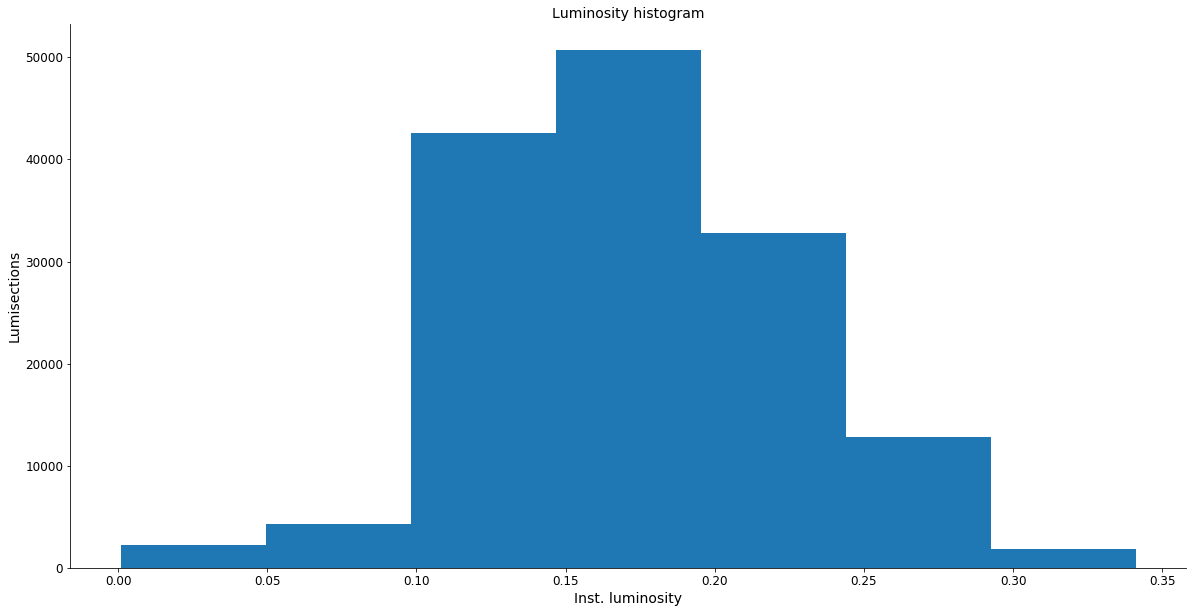

In [31]:
plt.hist(data['inst_lumi'], bins=7)
print(np.mean(data['inst_lumi']))
plt.title("Luminosity histogram")
plt.xlabel("Inst. luminosity")
plt.ylabel("Lumisections")
plt.show()

0.17046093086572395


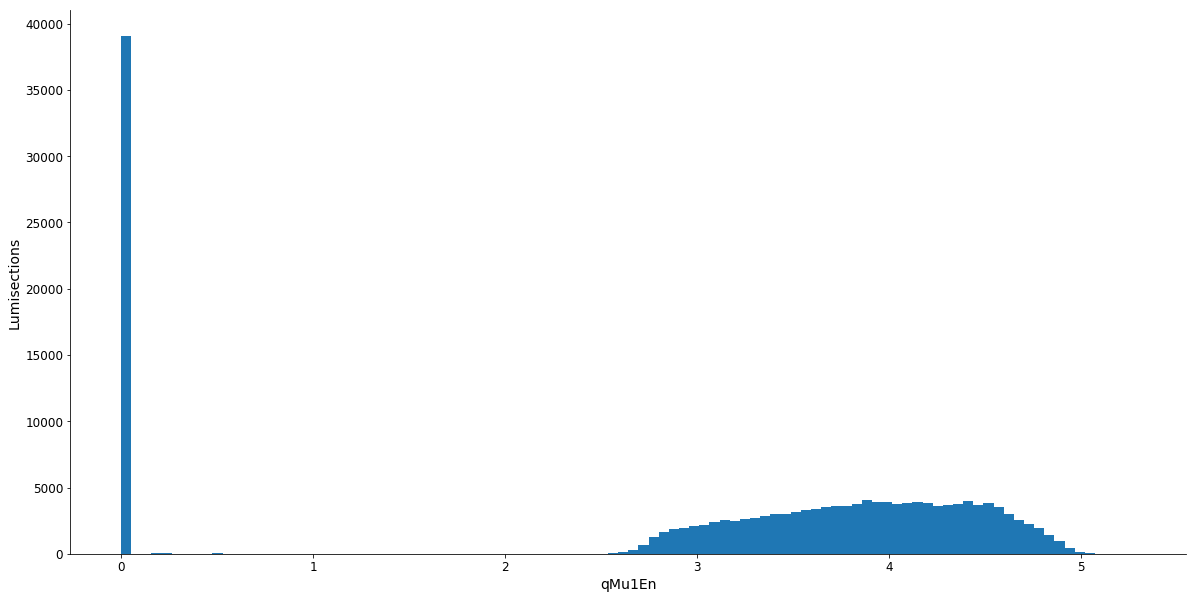

In [28]:
idx = 1417
i, r = divmod(idx, 7)
plt.hist(data[idx], bins=100)
print(np.mean(data['inst_lumi']))
plt.ylabel("Lumisections")
plt.xlabel(feature_names[i])
plt.show()

In [25]:
data.iloc[:, 1417].to_string()

'0         4.336119\n1         4.279817\n2         4.315859\n3         4.384909\n4         3.162209\n5         3.053502\n6         3.880349\n7         0.000000\n8         0.000000\n9         0.000000\n10        0.000000\n11        0.000000\n12        0.000000\n13        0.000000\n14        0.000000\n15        4.311540\n16        4.233629\n17        4.410810\n18        4.339203\n19        3.354161\n20        4.286428\n21        4.346137\n22        4.256557\n23        2.680896\n24        0.000000\n25        4.312488\n26        4.219900\n27        4.158968\n28        4.035312\n29        4.030583\n30        3.942636\n31        4.013443\n32        4.309202\n33        4.475237\n34        4.259277\n35        4.081647\n36        4.372655\n37        4.080062\n38        3.831961\n39        0.000000\n40        0.000000\n41        4.273420\n42        4.478976\n43        4.173163\n44        4.208653\n45        4.186370\n46        4.311755\n47        4.265193\n48        0.000000\n49        4.002297\

In [32]:
def pred_vs_feature(y_val, x_val, y_class, y_name="", x_name="", selected=[], linear=False,
                    x_lim=None, y_lim=None, title=""):
    '''
    Plots two arbitrary values agains each other.
    '''
    df = pd.DataFrame({'y_val': y_val,
                       'x_val': x_val,
                       'y_class': y_class})

    groups = df.groupby('y_class')
    fig, ax = plt.subplots()

    for name, group in groups:
        ax.plot(group.x_val, 
                group.y_val,
                color="red" if name == 1 else "g",
                marker='o',
                ms=2,
                linestyle='',
                label= "Bad" if name == 1 else "Good")

    for i in selected:
        ax.plot(x_val[i],
                y_val[i],
                color="green",
                marker='o',
                ms=4,
                linestyle='')
                 
    ax.legend()
    if not linear:
        ax.set_yscale('log')
    if x_lim:
        plt.xlim(x_lim[0], x_lim[1])
    if y_lim:
        plt.ylim(y_lim[0], y_lim[1])
    plt.grid()
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    plt.title(title)
    plt.show()

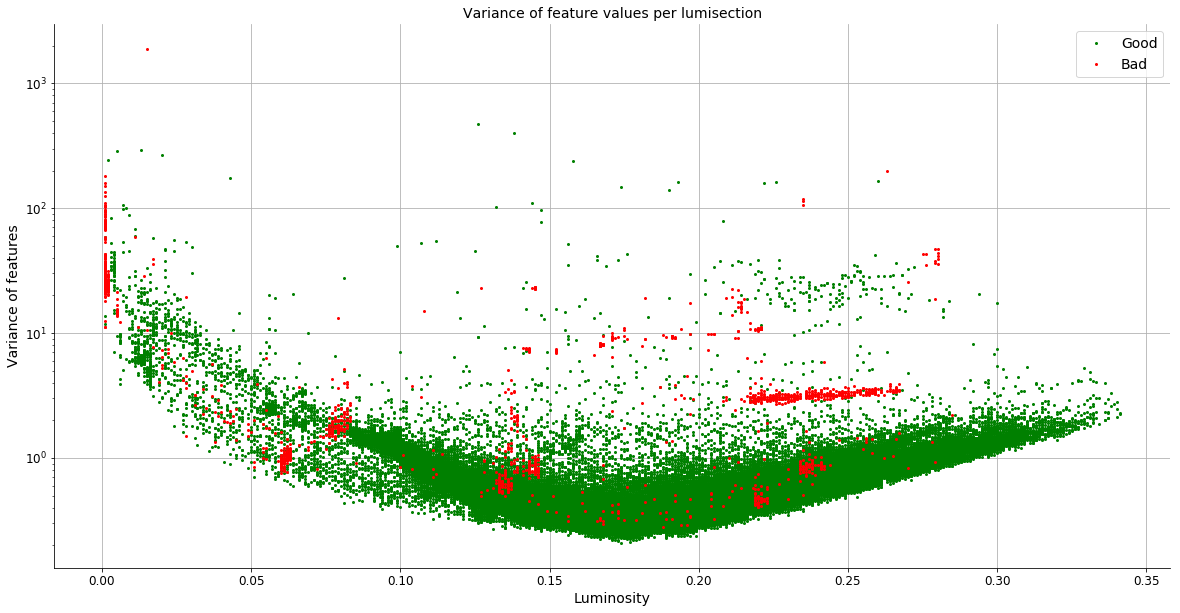

In [33]:
pred_vs_feature(mean_square, luminosity, y, "Variance of features", "Luminosity", title="Variance of feature values per lumisection",
    )

In [34]:
STEP = 0.05
#SAMPLE_SIZE = 2377
SAMPLE_SIZE=100

features_good = []
features_bad = []

good_mean_mean = []
good_mean_median = []
bad_mean_mean = []
bad_mean_median = []
good_variance = []
bad_variance = []

def plot_mean_features(X, y):
    
    lower_bounds = np.arange(0, 0.35, STEP)
    y_old = y
    
    for i in lower_bounds:
        data_filtered = data[(data['inst_lumi'] >= i) & (data['inst_lumi'] <= i+STEP)]
        y = y_old[(data['inst_lumi'] >= i) & (data['inst_lumi'] <= i+STEP)]

        range_title = "Luminosity range: " + str(i) + " - " + str(i+STEP)
        print(range_title)
        
        print("Dataset size:", len(data_filtered))
        X = data_filtered.iloc[:, 0:2806]
        X_good = X[y == 0]
        X_bad = X[y == 1]
        print("Good samples:", len(X_good))
        print("Bad samples:", len(X_bad))
        
        sample_good = X_good.sample(SAMPLE_SIZE)        
        good_mean = abs(np.mean(sample_good, axis=0))
        good_median = abs(np.median(sample_good, axis=0))
        good_variance.append(np.median(np.var(sample_good, axis=1)))
        
        if len(X_bad) > 0:
            bad_sample = X_bad.sample(SAMPLE_SIZE)
            bad_mean = abs(np.mean(bad_sample, axis=0))
            bad_median = abs(np.median(bad_sample, axis=0))
            bad_mean_mean.append(np.mean(bad_mean))
            bad_mean_median.append(np.mean(bad_median))
            bad_variance.append(np.median(np.var(bad_sample, axis=1)))
        else:
            bad_mean_mean.append(0)
            bad_mean_median.append(0)
            bad_variance.append(0)
            
        good_mean_mean.append(np.mean(good_mean))
        good_mean_median.append(np.mean(good_median))
    
        fig, (ax1, ax2) = plt.subplots(2, sharex=True)
        
        if len(X_bad) > 0:
            ax1.plot(np.array([i for i in range(len(bad_mean))]),
                     bad_mean,
                     color="r",
                     linestyle='-',
                     ms=2,
                     alpha=0.5,
                     marker='o',
                     label="Bad")
        
        ax1.plot(np.array([i for i in range(len(good_mean))]),
                 good_mean,
                 color="g",
                 linestyle='-',
                 ms=2,
                 alpha=0.5,
                 marker='o',
                 label="Good")
        
        if len(X_bad) > 0:
            ax2.plot(np.array([i for i in range(len(bad_median))]),
                     bad_median,
                     color="r",
                     linestyle='-',
                     ms=2,
                     alpha=0.5,
                     marker='o',
                     label="Bad")

        ax2.plot(np.array([i for i in range(len(good_median))]),
                 good_median,
                 color="g",
                 linestyle='-',
                 alpha=0.5,
                 ms=2,
                 marker='o',
                 label="Good")
        
        ax1.set_title(range_title + ", mean")
        ax2.set_title(range_title + ", median")
        
#         plt.xlim([0, 100])
        ax1.set_ylim([0, 20])
        ax2.set_ylim([0, 20])
        
        ax1.legend()
        ax2.legend()
        plt.ylabel("Value")
        plt.xlabel("Feature #")
        plt.show()

## Plots showing mean and median of each feature across randomly chosen 100 good and 100 bad lumisections (separately) in luminosity ranges

Luminosity range: 0.0 - 0.05
Dataset size: 2251
Good samples: 1635
Bad samples: 616


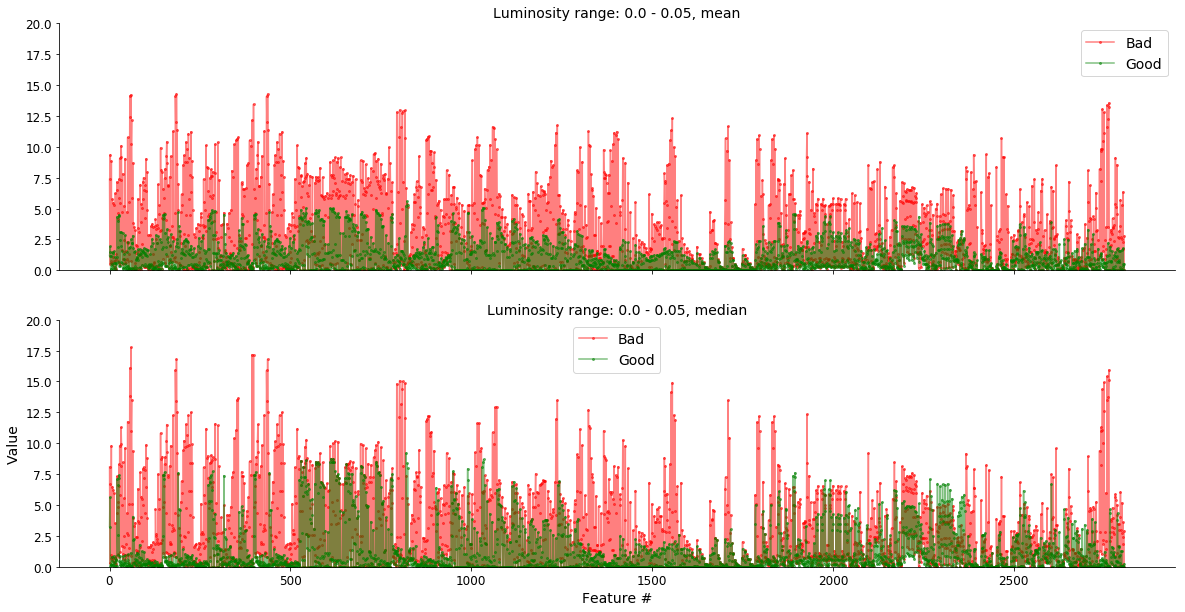

Luminosity range: 0.05 - 0.1
Dataset size: 4621
Good samples: 4376
Bad samples: 245


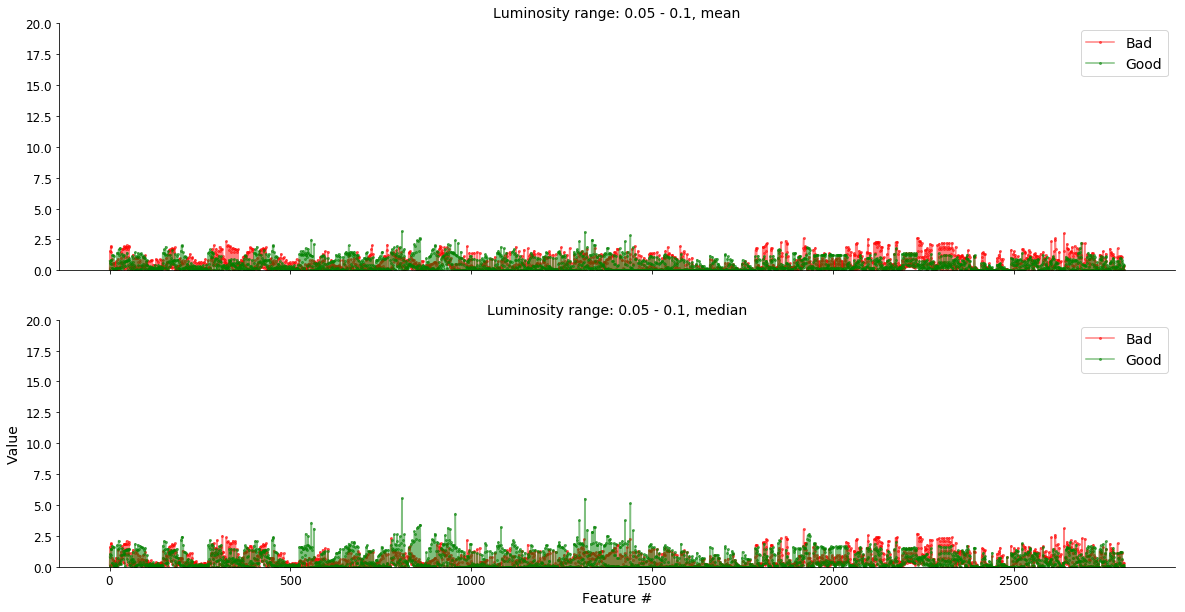

Luminosity range: 0.1 - 0.15
Dataset size: 45742
Good samples: 45492
Bad samples: 250


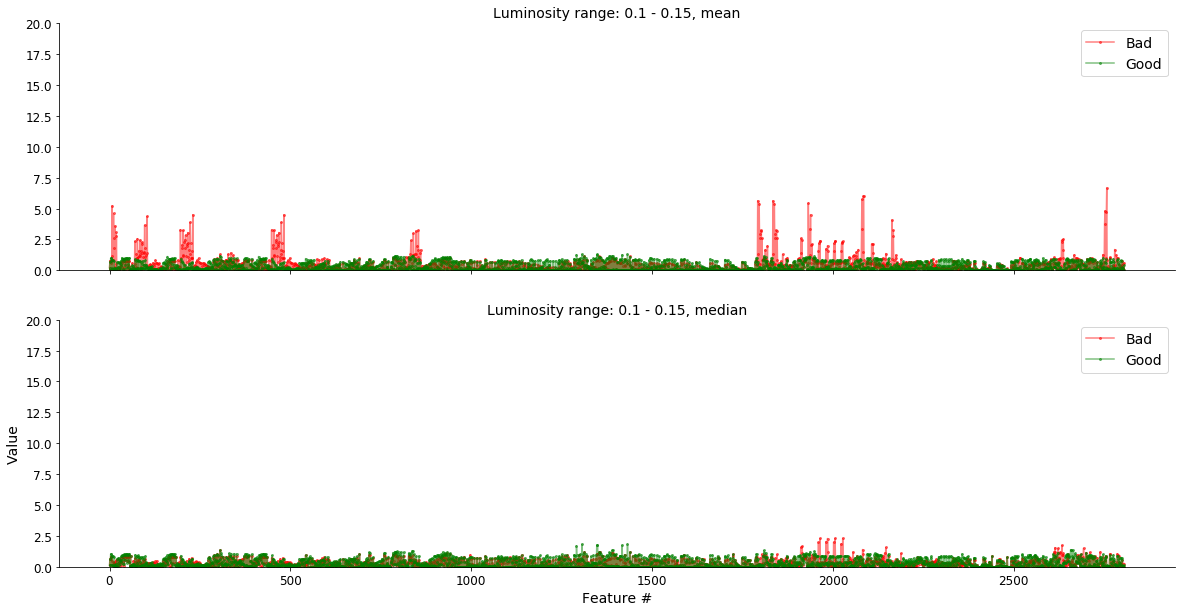

Luminosity range: 0.15 - 0.2
Dataset size: 50895
Good samples: 50773
Bad samples: 122


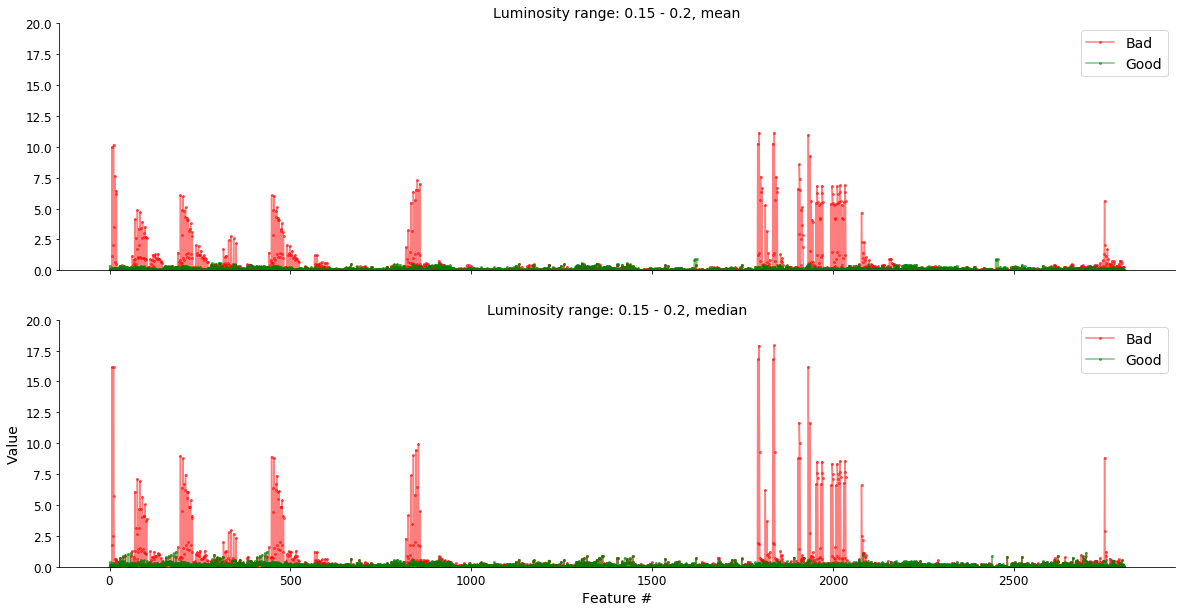

Luminosity range: 0.2 - 0.25
Dataset size: 32526
Good samples: 32047
Bad samples: 479


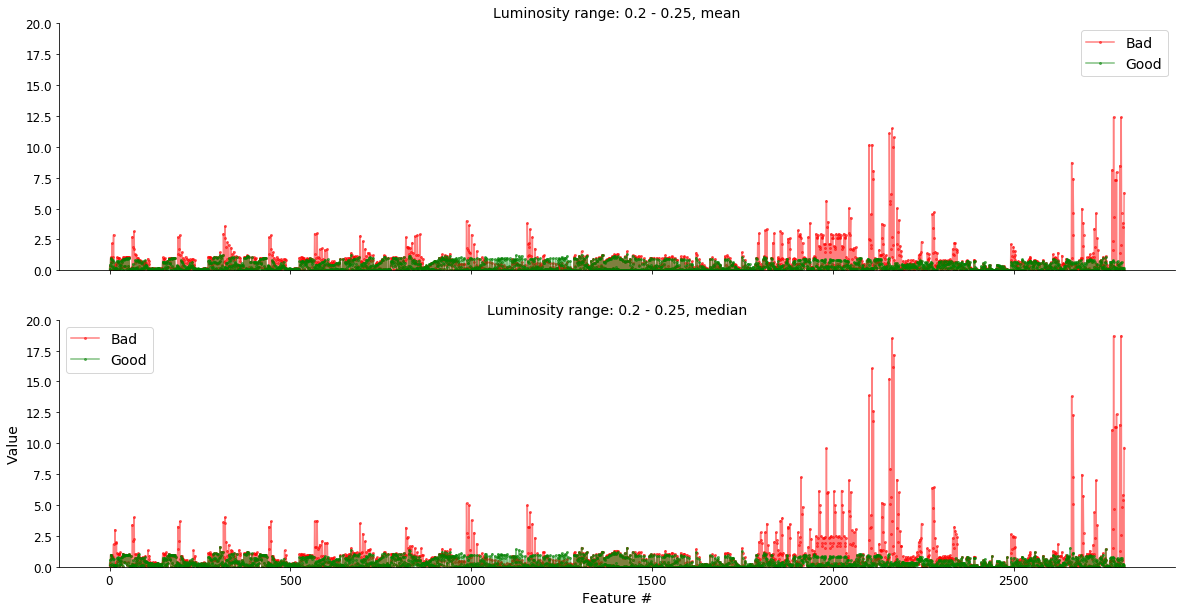

Luminosity range: 0.25 - 0.3
Dataset size: 10582
Good samples: 10464
Bad samples: 118


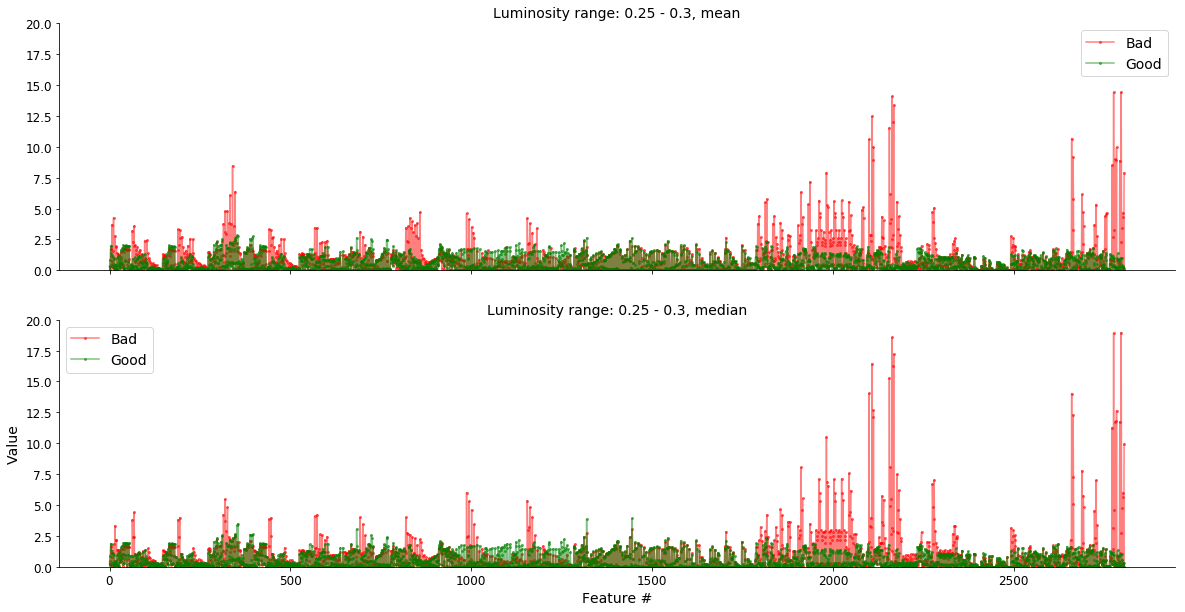

Luminosity range: 0.3 - 0.35
Dataset size: 1158
Good samples: 1158
Bad samples: 0


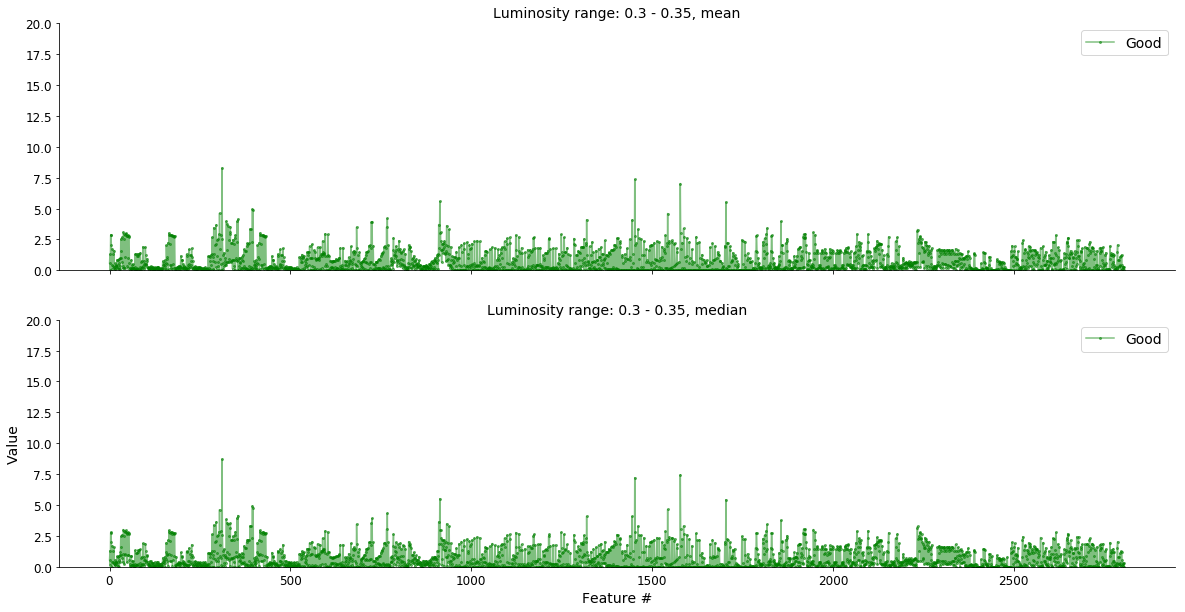

In [35]:
plot_mean_features(X, y)

In [36]:
def plot_means():
    matplotlib.rcParams["figure.figsize"] = (15, 10)

    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    ax1.bar(np.arange(0, 0.35, STEP),
           good_mean_mean,
           align='edge',
           width=0.05,
           color='g',
           alpha=0.5,
           label="Good")

    ax1.bar(np.arange(0, 0.35, STEP),
           bad_mean_mean,
           align='edge',
           width=0.05,
           color='r',
           alpha=0.5,
           label="Bad")

    ax1.set_ylabel("Mean mean")
    ax1.set_ylim((0, 3))
    ax1.set_title('Mean mean of features')
    ax1.grid()
    ax1.legend()

    ax2.bar(np.arange(0, 0.35, STEP),
           good_mean_median,
           align='edge',
           width=0.05,
           color='g',
           alpha=0.5,
           label="Good")

    ax2.bar(np.arange(0, 0.35, STEP),
           bad_mean_median,
           align='edge',
           width=0.05,
           color='r',
           alpha=0.5,
           label="Bad")

    ax2.set_ylim((0, 3))
    ax2.set_ylabel("Mean median")
    ax2.set_title('Mean median of features')
    ax2.legend()
    
    plt.xlabel('Luminosity')
    ax2.grid()
    plt.show()

## Mean of above values

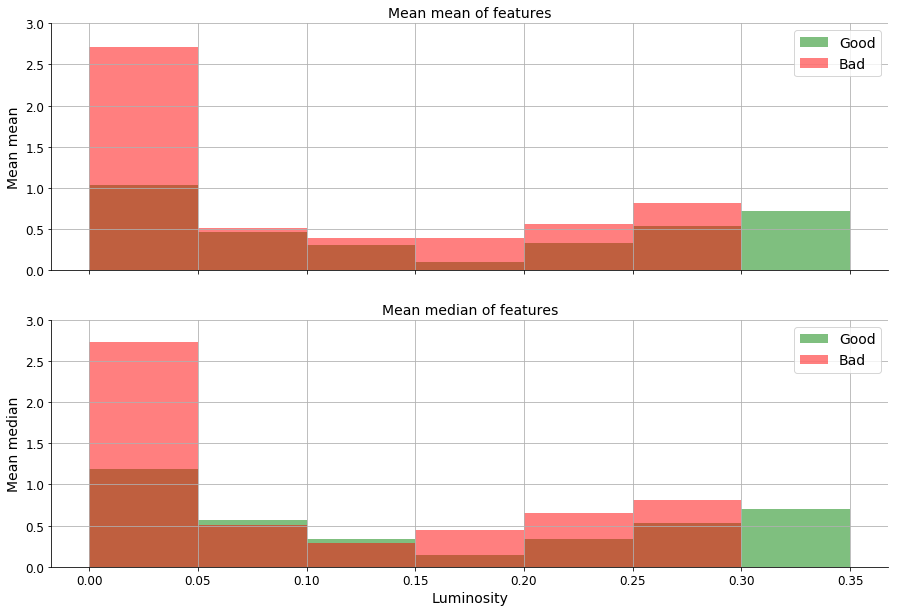

In [37]:
plot_means()

In [38]:
def plot_means_difference():
    matplotlib.rcParams["figure.figsize"] = (15, 10)

    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    ax1.bar(np.arange(0, 0.35, STEP),
           np.asarray(bad_mean_mean) - np.asarray(good_mean_mean),
           align='edge',
           width=0.05,
           color='b',
           alpha=0.5)

    ax1.set_ylabel("Difference")
    ax1.set_ylim((-2, 2))
    ax1.set_title("Difference between bad and good means of means")
    ax1.grid()
    ax1.legend()

    ax2.bar(np.arange(0, 0.35, STEP),
           np.asarray(bad_mean_median) - np.asarray(good_mean_median),
           align='edge',
           width=0.05,
           color='b',
           alpha=0.5)

    ax2.set_ylim((-2, 2))
    ax2.set_ylabel("Difference")
    ax2.set_title('Difference between bad and good means of medians')
    ax2.legend()
    
    plt.xlabel('Luminosity')
    ax2.grid()
    plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


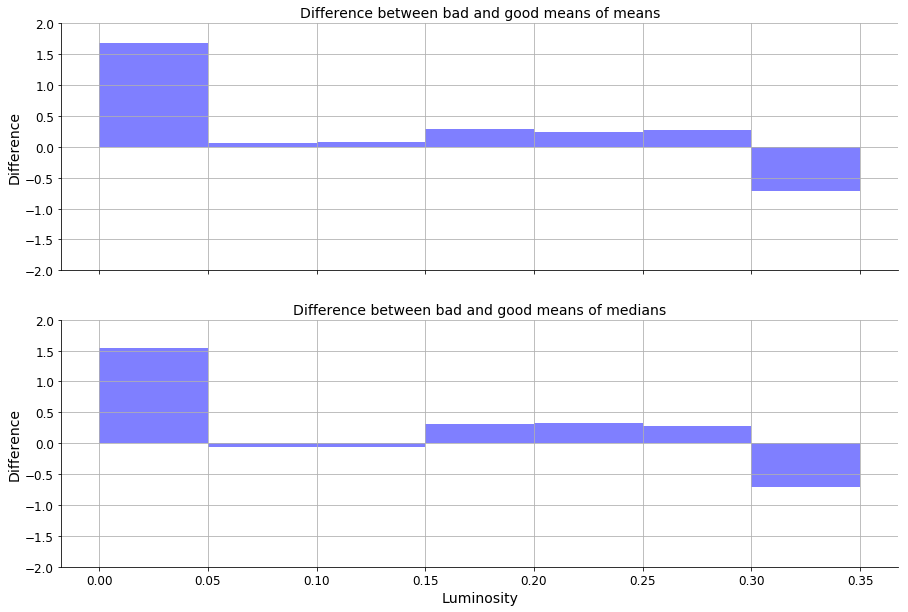

In [39]:
plot_means_difference()

In [40]:
def plot_var():
    matplotlib.rcParams["figure.figsize"] = (15, 10)

    fig, ax1 = plt.subplots()
    ax1.bar(np.arange(0, 0.35, STEP),
           good_variance,
           align='edge',
           width=0.05,
           color='g',
           alpha=0.5,
           label="Good")

    

    ax1.bar(np.arange(0, 0.35, STEP),
           bad_variance,
           align='edge',
           width=0.05,
           color='r',
           alpha=0.5,
           label="Bad")

    ax1.set_ylabel("Median variance of features")
    #ax1.set_ylim((-2, 2))
    ax1.set_title("Median variance of feature values")
    ax1.grid()
    ax1.legend()
    
    plt.xlabel('Luminosity')
    plt.show()

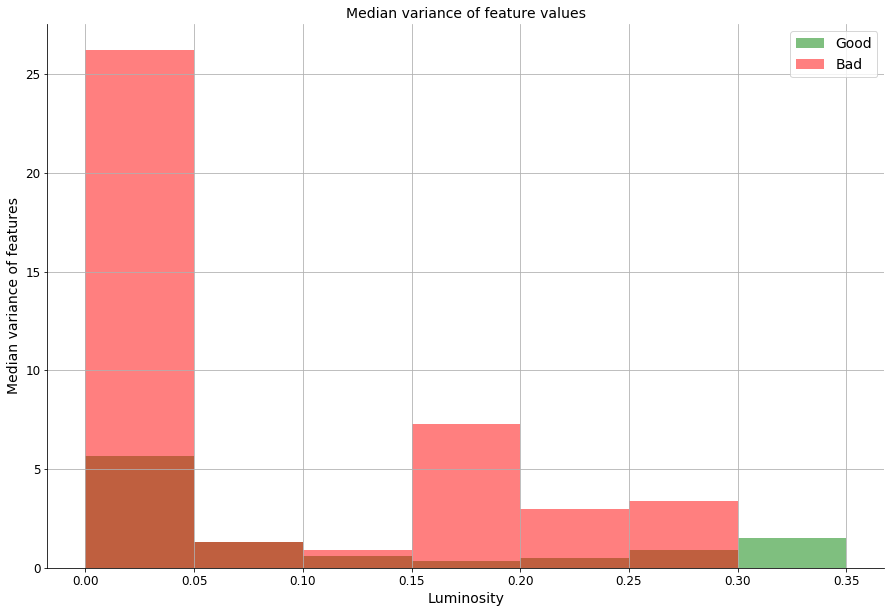

In [41]:
plot_var()

In [42]:
def pred_vs_feature3(y_val, x_val, y_class, y_name="", x_name="", selected=[], linear=False,
                    x_lim=None, y_lim=None, title="", bar=None):

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
    
    ax = [ax1, ax2, ax3]
    ax1.set_title(title)
    
    for i in range(3):
        df = pd.DataFrame({'y_val': y_val[i],
                           'x_val': x_val,
                           'y_class': y_class})

        groups = df.groupby('y_class')

        for name, group in groups:
            ax[i].plot(group.x_val, 
                    group.y_val,
                    color="r" if name == 1 else "g",
                    marker='o',
                    ms=2,
                    linestyle='',
                    label= "Bad" if name == 1 else "Good")

        for i in selected:
            ax[i].plot(x_val[i],
                    y_val[i],
                    color="g",
                    marker='o',
                    ms=4,
                    linestyle='')
        if bar and i==2:
            ax[i].axhline(y=BAR, color='purple')
            ax[i].axvline(x=V_BAR, color='purple')
            ax[i].axhspan(ymin=BAR, ymax=6, xmax=V_BAR/0.35, color='b', alpha=0.2)
            ax[i].axhspan(ymin=-6, ymax=BAR, xmax=V_BAR/0.35, color='orange', alpha=0.2)
    
        
        ax[i].legend()
        if not linear:
            ax[i].set_yscale('log')
        if x_lim:
            ax[i].set_xlim(x_lim[0], x_lim[1])
        if y_lim:
            ax[i].set_ylim(y_lim[0], y_lim[1])
        ax[i].set_ylabel(y_name[i])
        ax[i].grid()
    plt.xlabel(x_name)
   
    plt.show()

In [43]:
def pred_vs_feature2(y_val, x_val, y_class, y_name="", x_name="", selected=[], linear=False,
                    x_lim=None, y_lim=None, title=""):

    fig, (ax1) = plt.subplots(1, 1, sharex=True)
    
    ax = [ax1]
    ax1.set_title(title)
    
    for i in range(1):
        df = pd.DataFrame({'y_val': y_val[i],
                           'x_val': x_val,
                           'y_class': y_class})

        groups = df.groupby('y_class')

        for name, group in groups:
            ax[i].plot(group.x_val, 
                    group.y_val,
                    color="r" if name == 1 else "g",
                    marker='o',
                    ms=2,
                    linestyle='',
                    label= "Bad" if name == 1 else "Good")

        for i in selected:
            ax[i].plot(x_val[i],
                    y_val[i],
                    color="g",
                    marker='o',
                    ms=4,
                    linestyle='')

        ax[i].legend()
        if not linear:
            ax[i].set_yscale('log')
        if x_lim:
            ax[i].set_xlim(x_lim[0], x_lim[1])
        if y_lim:
            ax[i].set_ylim(y_lim[0], y_lim[1])
        ax[i].set_ylabel(y_name[i])
        ax[i].grid()
    plt.xlabel(x_name)
   
    plt.show()

In [118]:
def plot_var(legend=legend, ae_pred=ae_pred):
    for var in legend:
            print("###########################################################################")
            print(var['name'])
            print("###########################################################################")

            X_var = X.iloc[:, var['start'] : var['end']+1]
            ae_pred_var = ae_pred[:, var['start'] : var['end']+1]

            mean = np.mean(X_var, axis=1)
            mean_abs = np.mean(np.abs(X_var), axis=1)
            sd = np.std(X_var, axis=1)
            
            ae_mean = np.mean(ae_pred_var, axis=1)
            ae_mean_abs = np.mean(np.abs(ae_pred_var), axis=1)
            ae_sd = np.std(ae_pred_var, axis=1)

            # No scale set
            pred_vs_feature2([mean, mean_abs, sd],
                            luminosity, 
                            y_test, #!!!
                            [var['name'], 
                             var['name'] + " abs"],
                            "Luminosity",
                            title=var['name'],
                            x_lim=(0, 0.35),
#                             y_lim=(-5, 5),
                            linear=True)
            
            pred_vs_feature2([ae_mean, ae_mean_abs, ae_sd],
                            luminosity, 
                            y_test, #!!!
                            [var['name'], 
                             var['name'] + " AE pred"],
                            "Luminosity",
                            title=var['name'] + " AE pred",
                            x_lim=(0, 0.35),
#                             y_lim=(-5, 5),
                            linear=True)
            
            # With bounds [-5, 5]
            pred_vs_feature2([mean, mean_abs, sd],
                            luminosity, 
                            y_test, #!!!
                            [var['name'], 
                             var['name'] + " abs"],
                            "Luminosity",
                            title=var['name'],
                            x_lim=(0, 0.35),
                            y_lim=(-5, 5),
                            linear=True)
            
            pred_vs_feature2([ae_mean, ae_mean_abs, ae_sd],
                            luminosity, 
                            y_test, #!!!
                            [var['name'], 
                             var['name'] + " AE pred"],
                            "Luminosity",
                            title=var['name'] + " AE pred",
                            x_lim=(0, 0.35),
                            y_lim=(-5, 5),
                            linear=True)


In [45]:
def plot_var_all(legend=legend):
    for var in legend:
            print("###########################################################################")
            print(var['name'])
            print("###########################################################################")

            X_var = X.iloc[:, var['start'] : var['end']+1]
            ae_pred_var = ae_pred[:, var['start'] : var['end']+1]

            mean = np.mean(X_var, axis=1)
            mean_abs = np.mean(np.abs(X_var), axis=1)
            sd = np.std(X_var, axis=1)
            
            ae_mean = np.mean(ae_pred_var, axis=1)
            ae_mean_abs = np.mean(np.abs(ae_pred_var), axis=1)
            ae_sd = np.std(ae_pred_var, axis=1)

            pred_vs_feature3([mean, mean_abs, sd],
                            luminosity, 
                            y_test, #!!!
                            ["Mean", 
                             "Mean abs", 
                             "Standard deviation"],
                            "Luminosity",
                            title='Feature values per lumisection - raw input',
                            x_lim=(0, 0.35),
                            y_lim=(-5, 5),
                            linear=True)
            
            pred_vs_feature3([ae_mean, ae_mean_abs, ae_sd],
                            luminosity, 
                            y_test, #!!!
                            ["Mean AE pred", 
                             "Mean abs AE pred", 
                             "Standard deviation AE pred"],
                            "Luminosity",
                            title="Feature values per lumisection - AE pred",
                            x_lim=(0, 0.35),
                            y_lim=(-5, 5),
                            linear=True,
                            bar=True)

In [120]:
# start_legend = 1918 #nvtx
start_legend = 1414

In [121]:
var_legend = [{'start': start_legend, 'end': start_legend, 'name': 'Mean'},
              {'start': start_legend+1, 'end': start_legend+1, 'name': 'RMS'},
              {'start': start_legend+2, 'end': start_legend+2, 'name': 'Q1'},
              {'start': start_legend+3, 'end': start_legend+3, 'name': 'Q2'},
              {'start': start_legend+4, 'end': start_legend+4, 'name': 'Q3'},
              {'start': start_legend+5, 'end': start_legend+5, 'name': 'Q4'},
              {'start': start_legend+6, 'end': start_legend+6, 'name': 'Q5'}]

In [122]:
whole_legend = [{'start': 0, 'end': 2806, 'name': 'All'}]

###########################################################################
Mean
###########################################################################


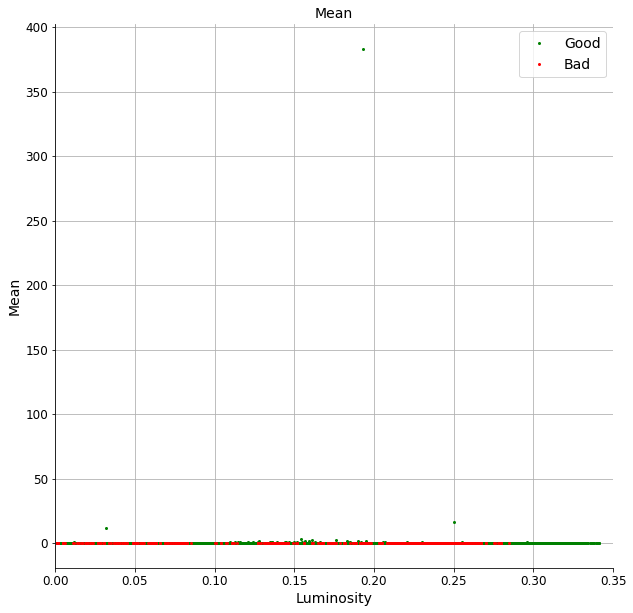

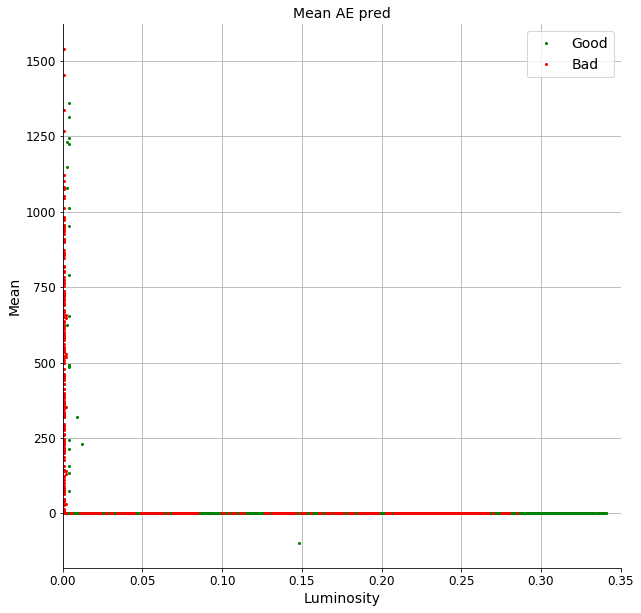

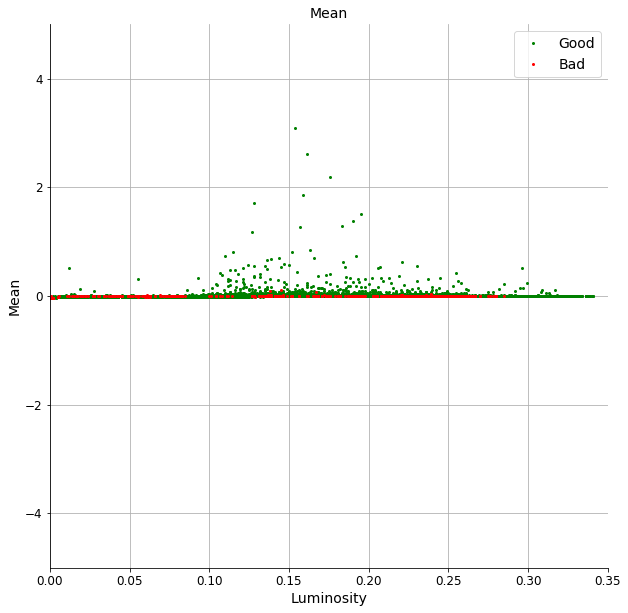

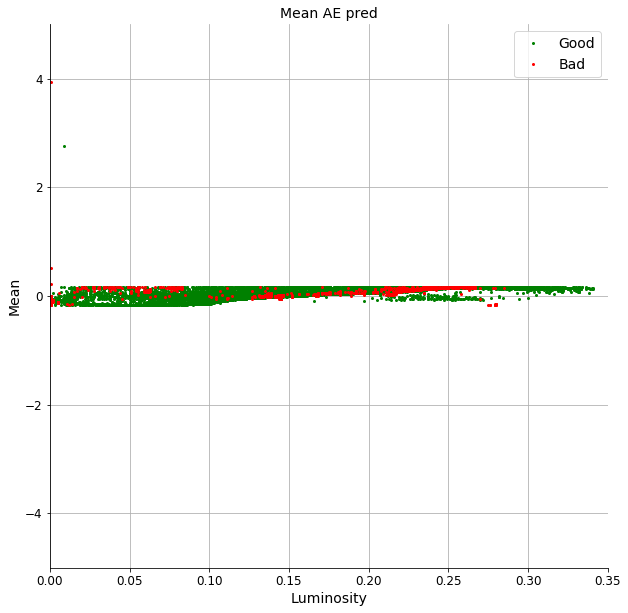

###########################################################################
RMS
###########################################################################


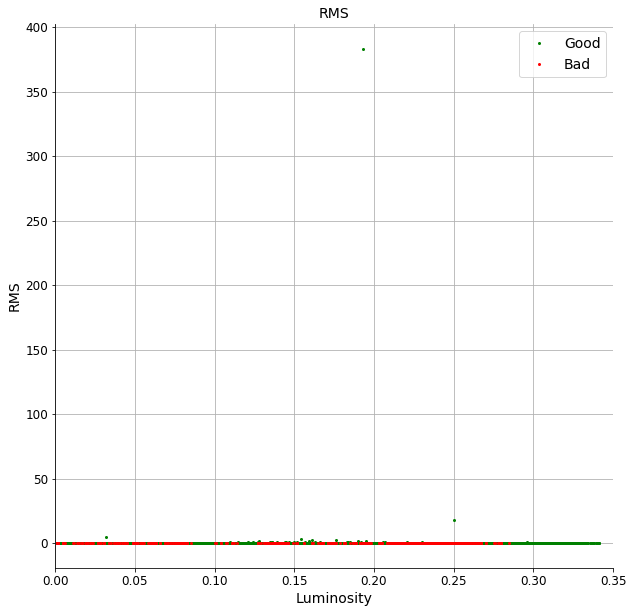

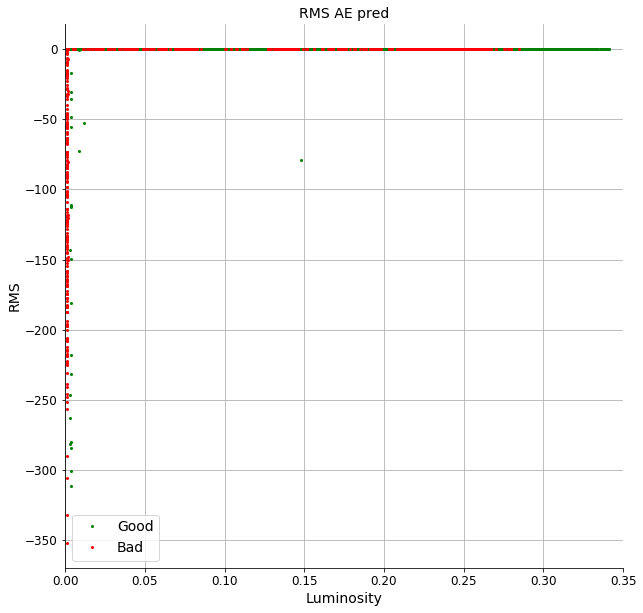

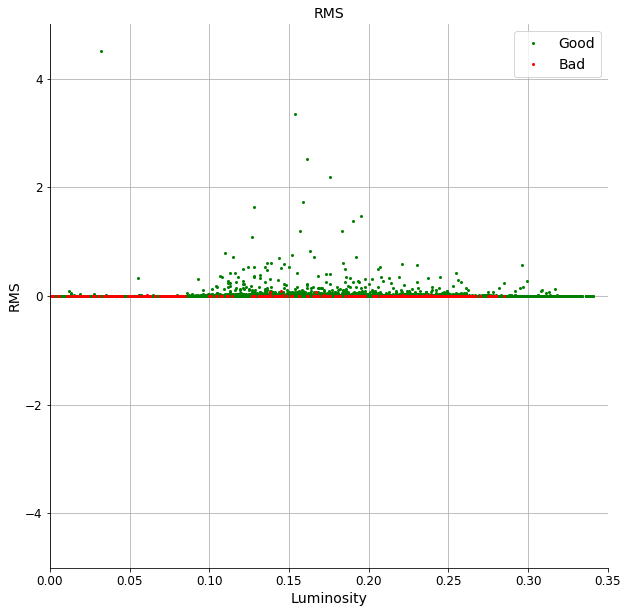

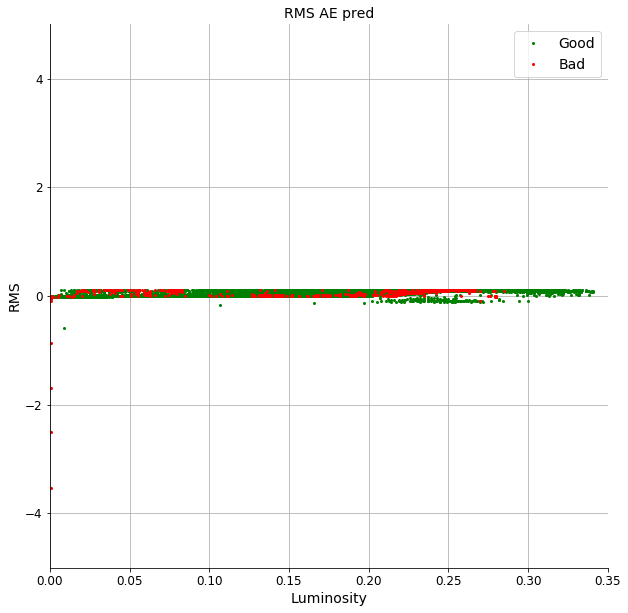

###########################################################################
Q1
###########################################################################


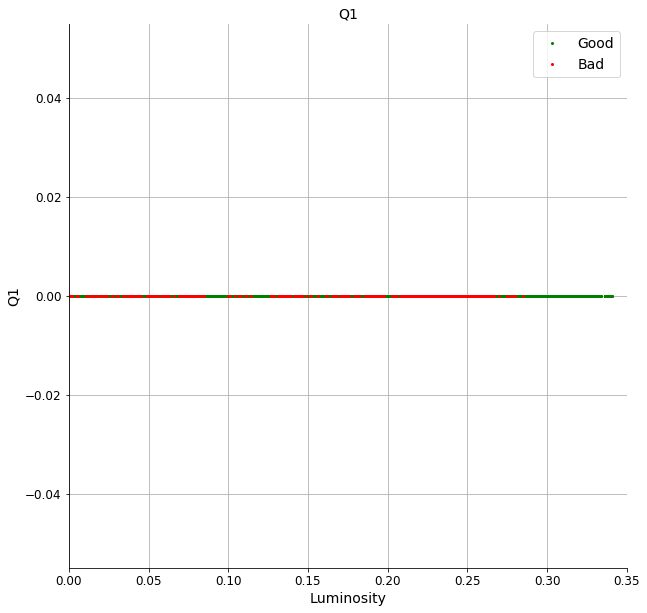

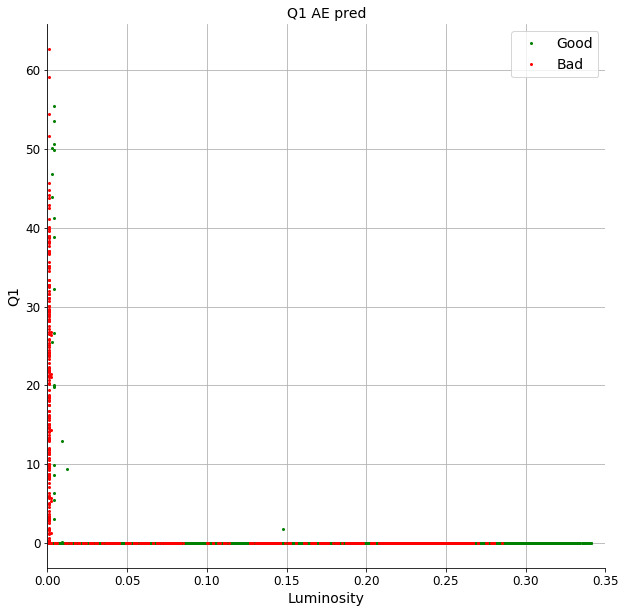

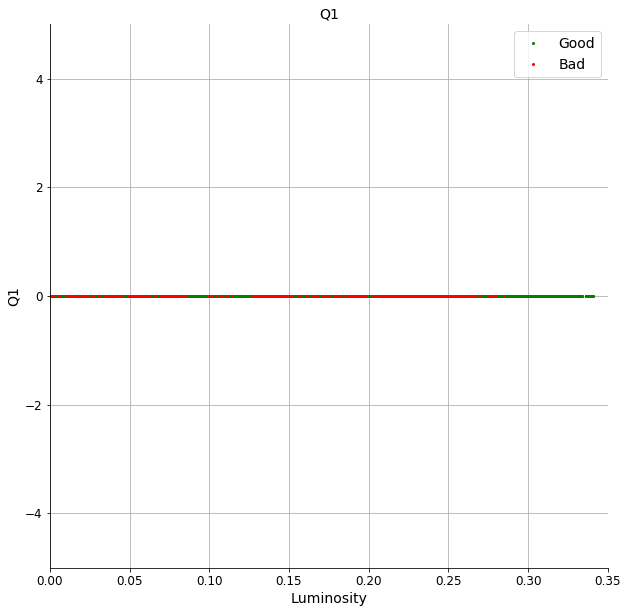

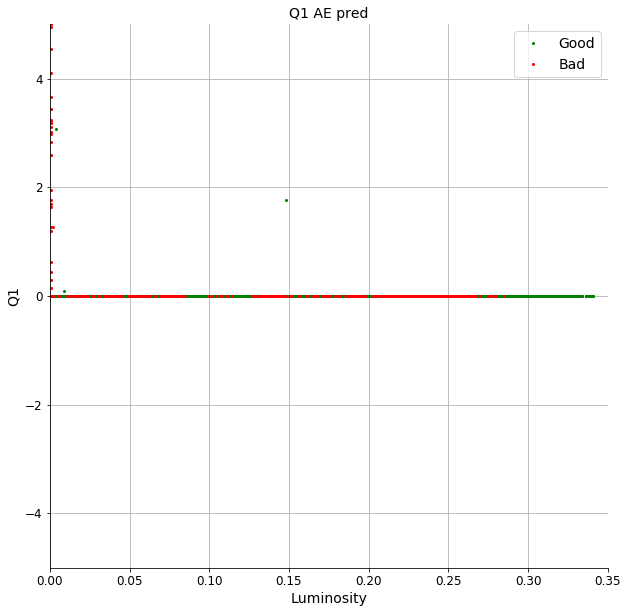

###########################################################################
Q2
###########################################################################


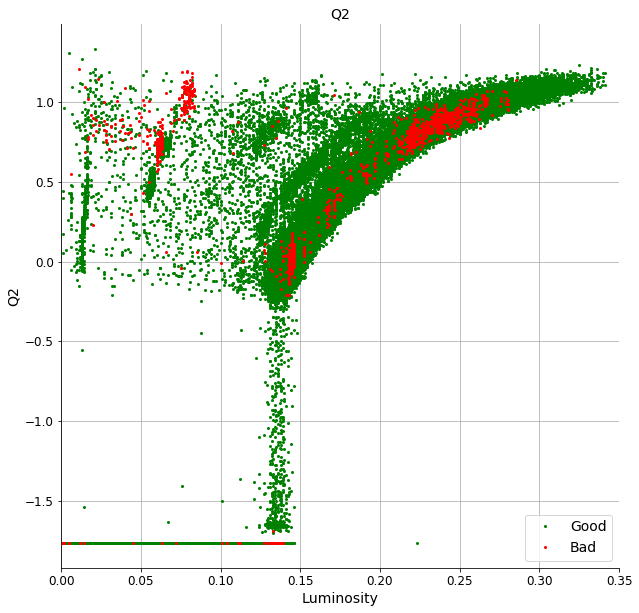

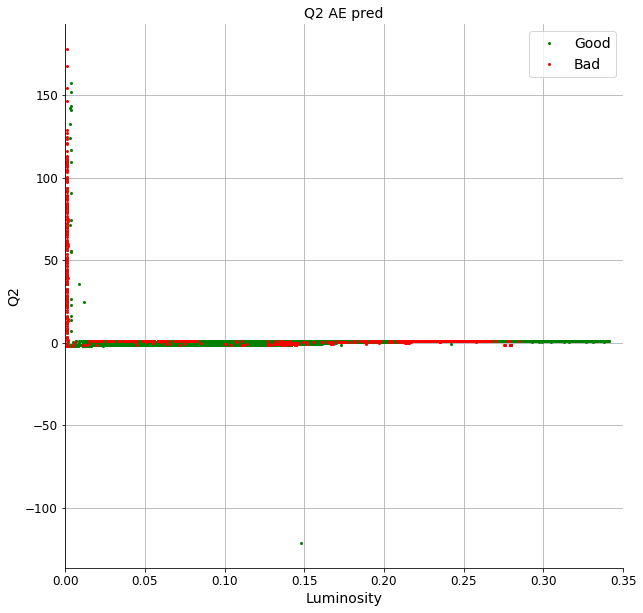

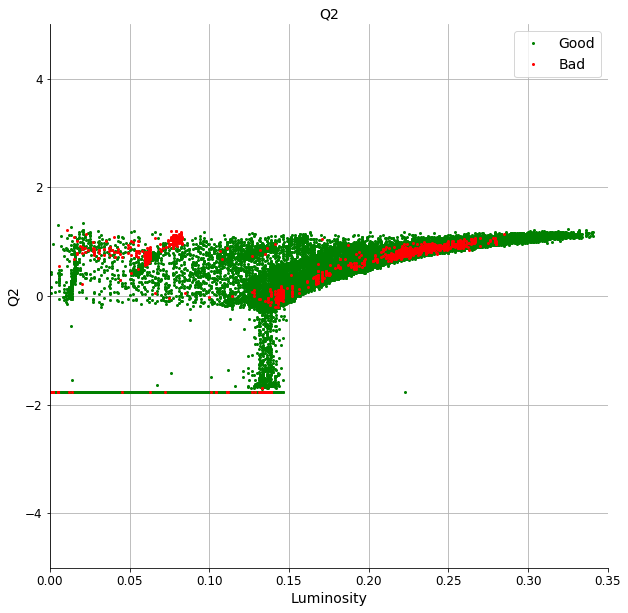

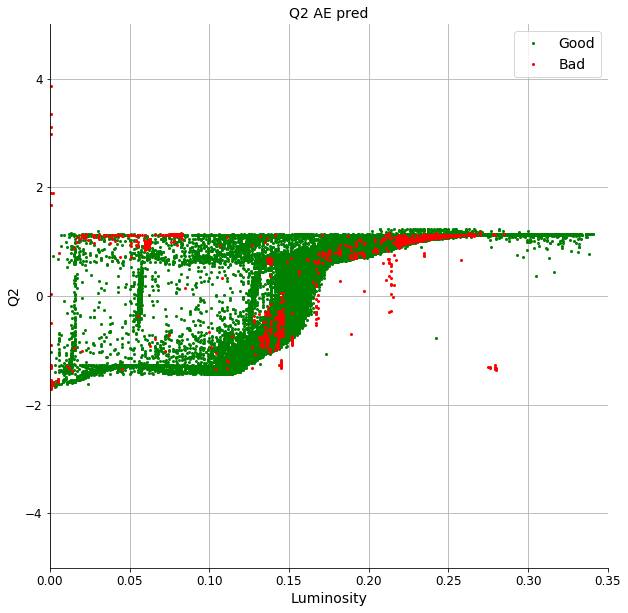

###########################################################################
Q3
###########################################################################


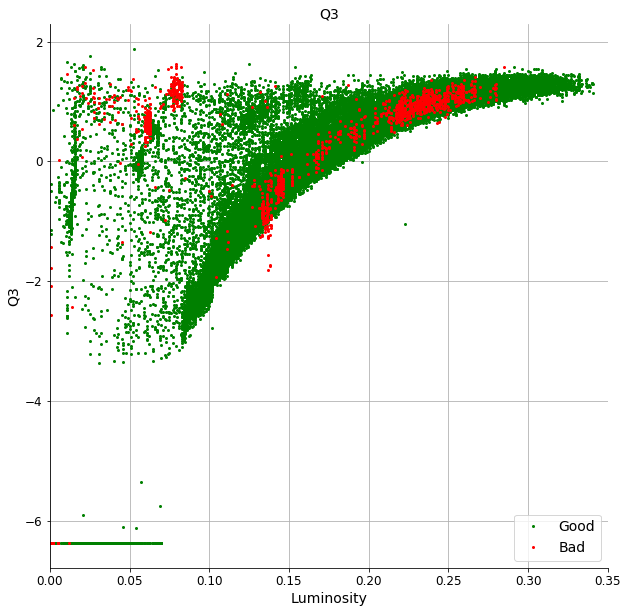

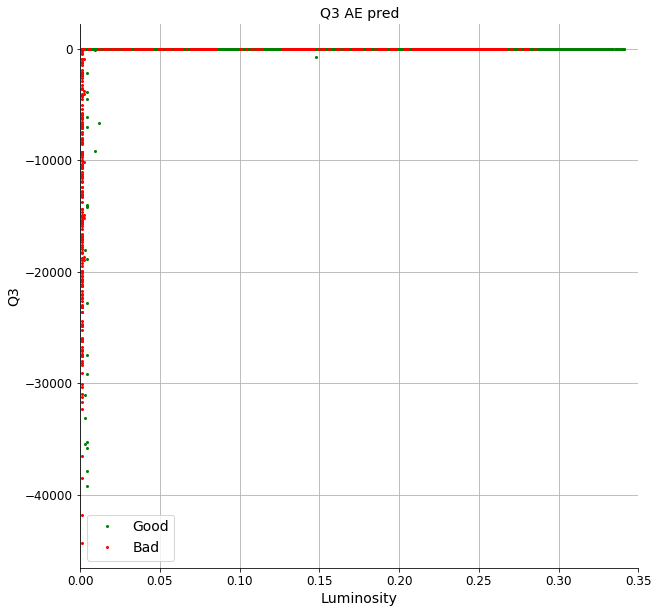

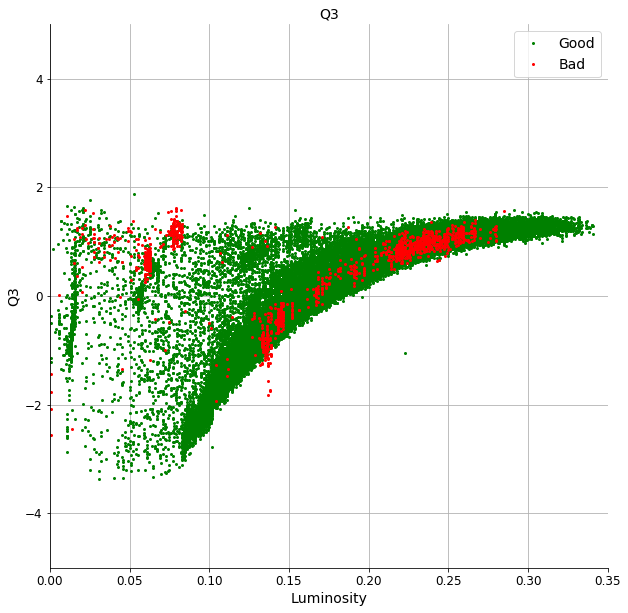

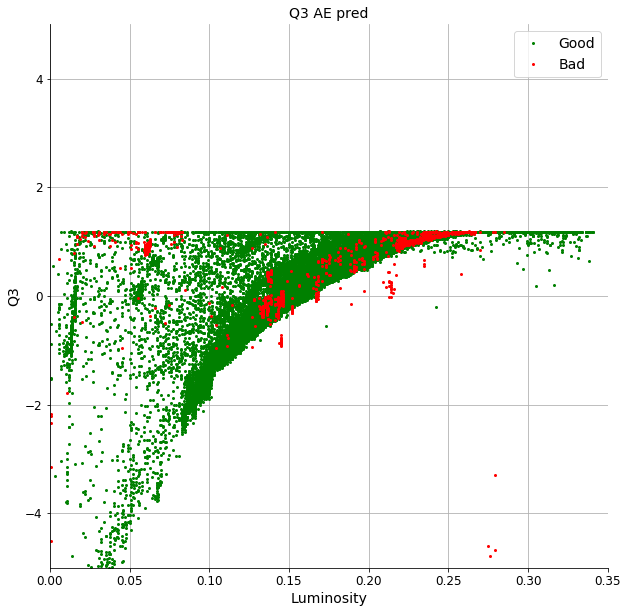

###########################################################################
Q4
###########################################################################


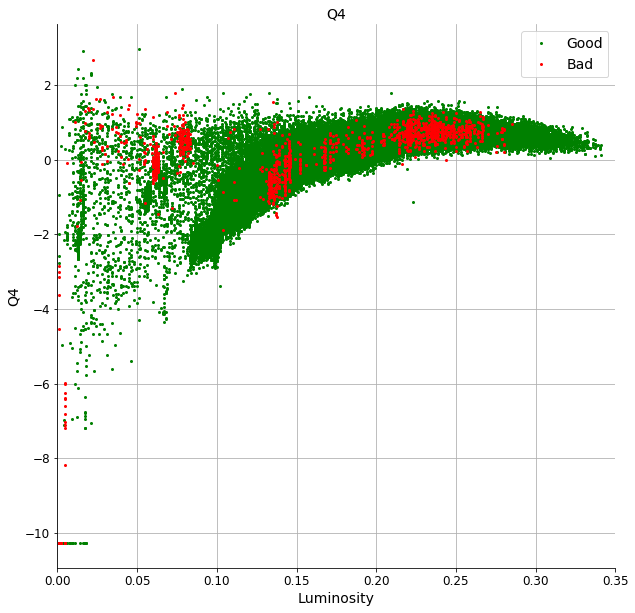

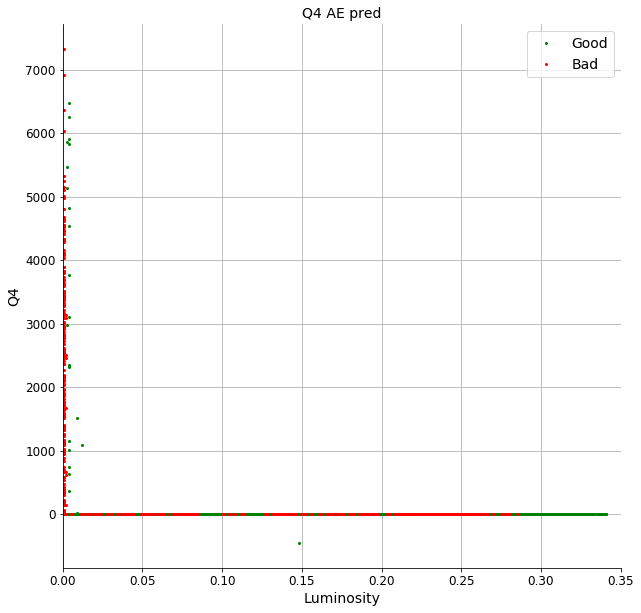

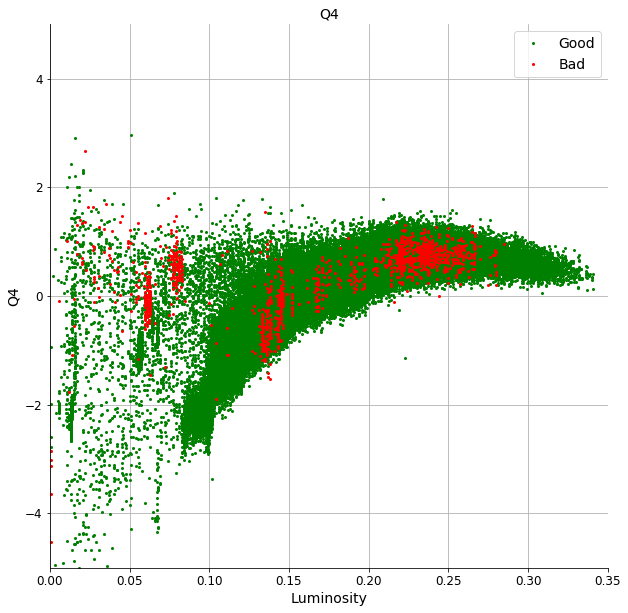

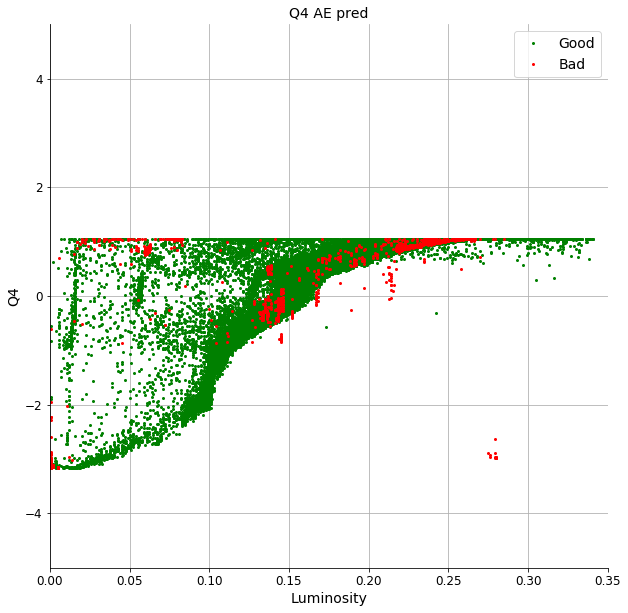

###########################################################################
Q5
###########################################################################


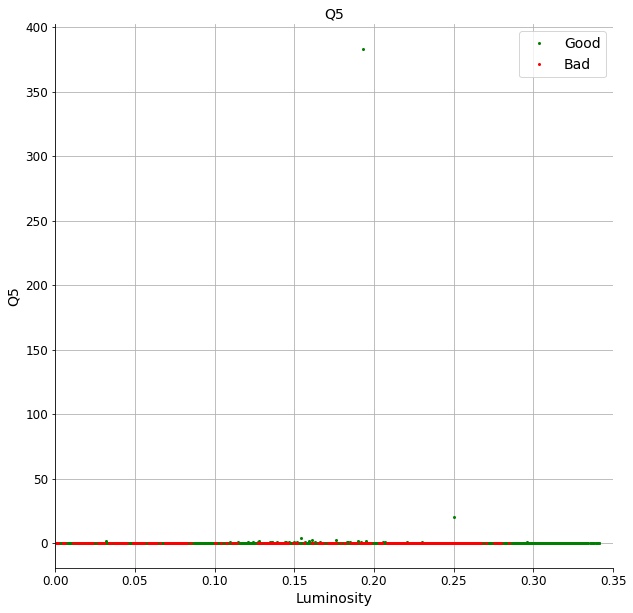

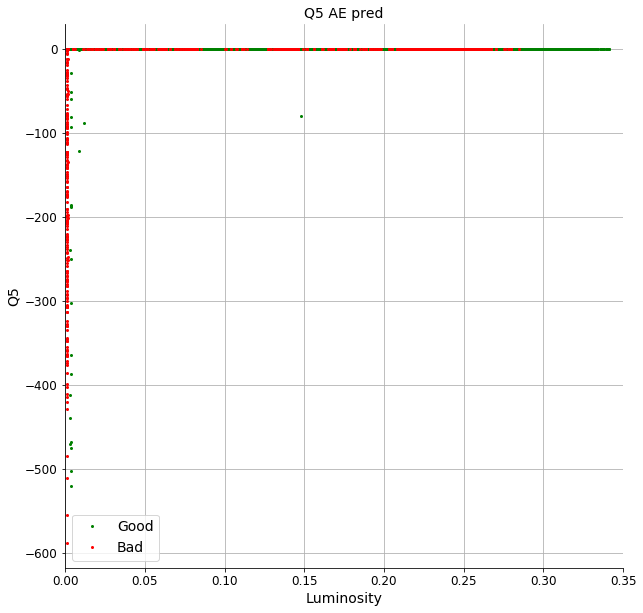

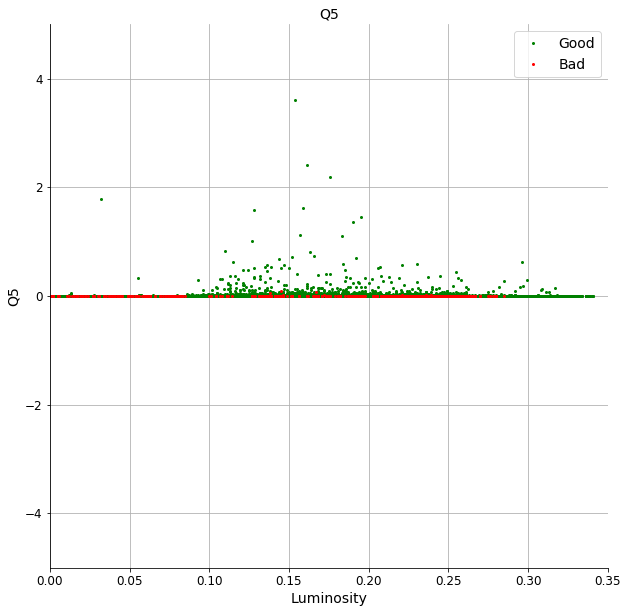

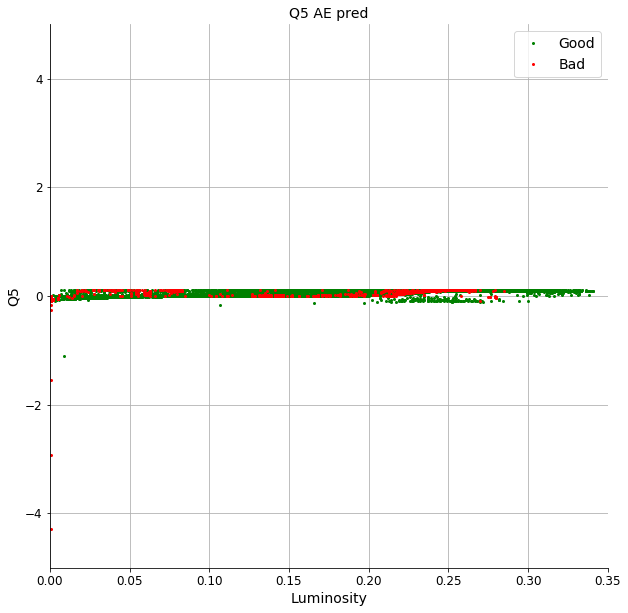

In [126]:
matplotlib.rcParams["figure.figsize"] = (10, 10)
plot_var(var_legend, ae_pred_prelu_linear)

In [50]:
pf_jets = legend[0]
ae_pred_var = ae_pred[:, pf_jets['start'] : pf_jets['end']+1]
ae_sd = np.std(ae_pred_var, axis=1)

ae_sd = np.std(ae_pred, axis=1)

In [51]:
BAR=1
V_BAR=0.05

In [52]:
idx_up = np.where((luminosity < V_BAR) & (ae_sd > BAR))
idx_down = np.where((luminosity < V_BAR) & (ae_sd <= BAR))

## Plots of mean, mean abs and sd of features for each variable subset

###########################################################################
All
###########################################################################


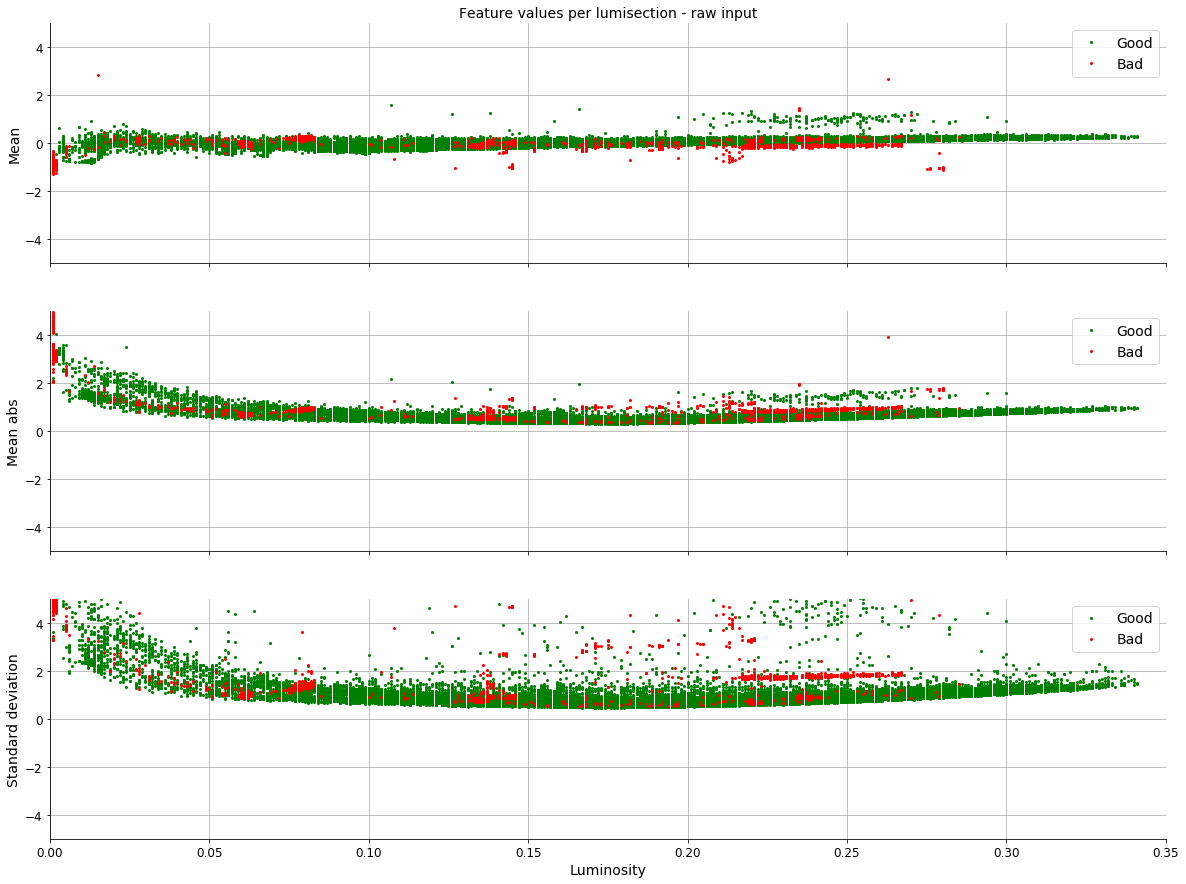

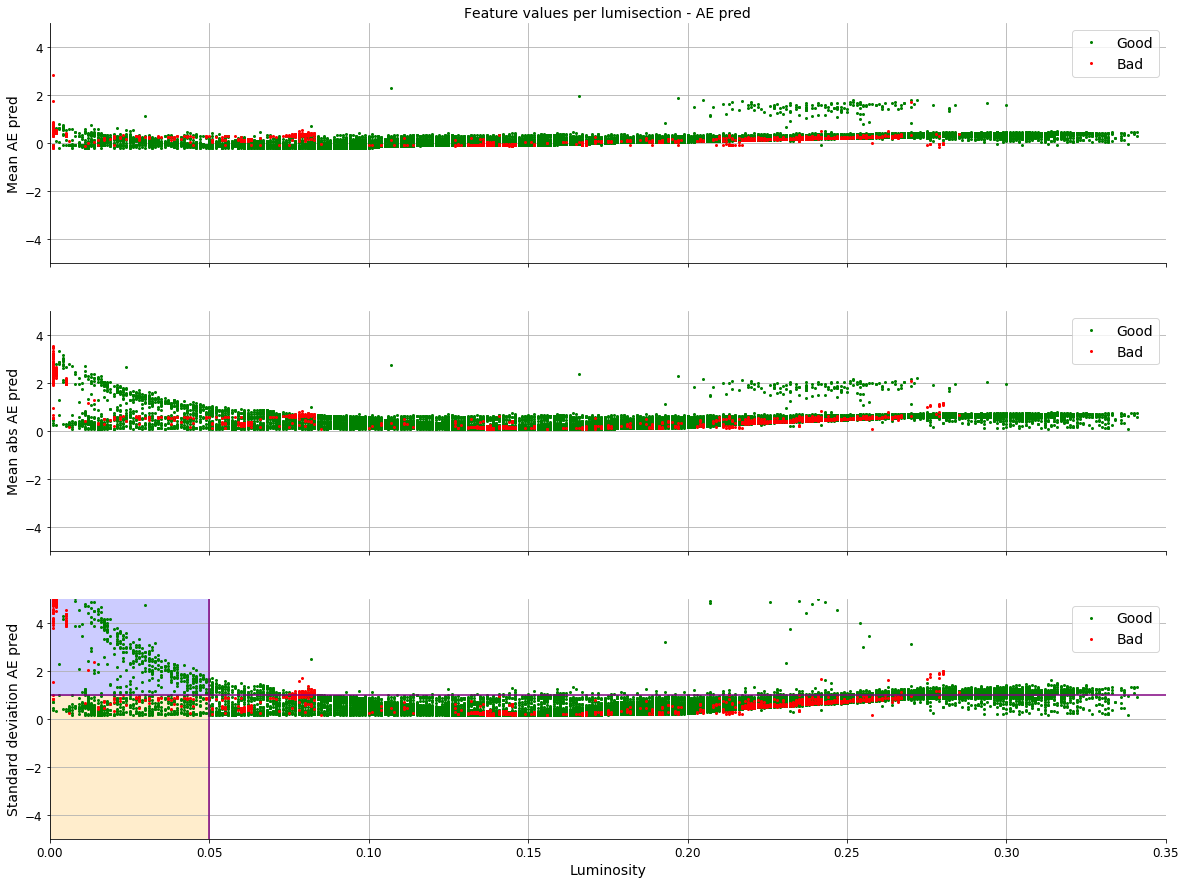

In [53]:
matplotlib.rcParams["figure.figsize"] = (20, 15)
plot_var_all(whole_legend)

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


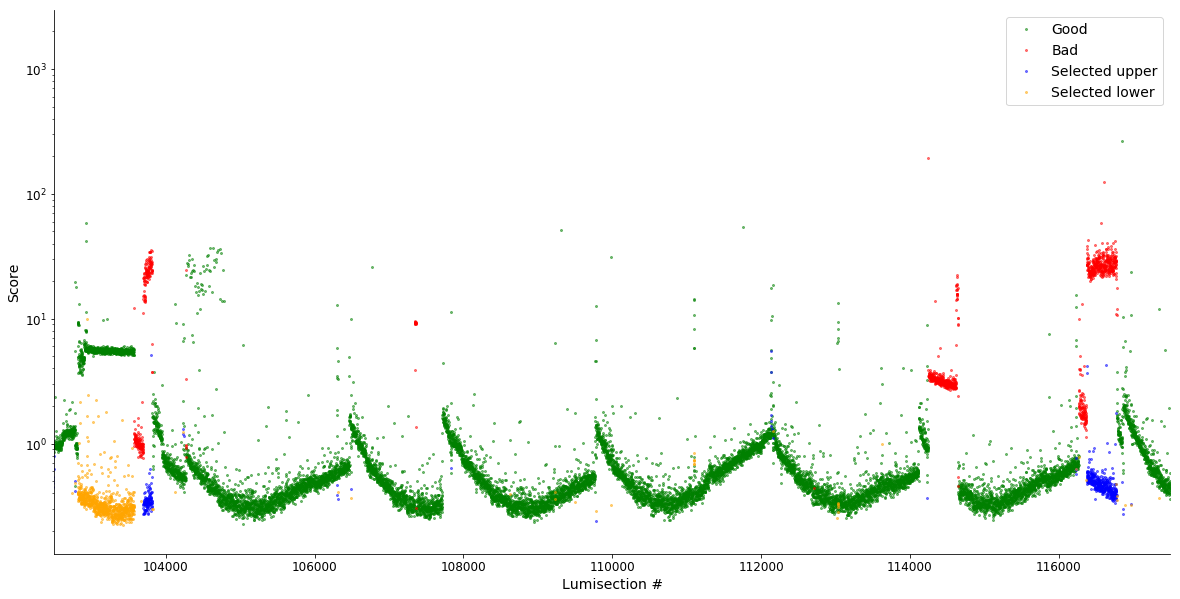

In [90]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
plot_lumi_error(y, variance, minx=102500, maxx=117500)
# plot_lumi_error(y, variance)

In [55]:
# Plot something over features
def plot_over_features(array, label, y_low=-20, y_high=20):
    features = [i for i in range(array.shape[0])]

    for l in legend:
        plt.plot(features[l["start"]:l["end"]],
                 array[l["start"]:l["end"]],
                 color=l["color"])

    plt.ylabel(label)
    plt.ylim([y_low, y_high])
    plt.xticks([l["start"] for l in legend], [l["name"] for l in legend], rotation='vertical')
    plt.show();

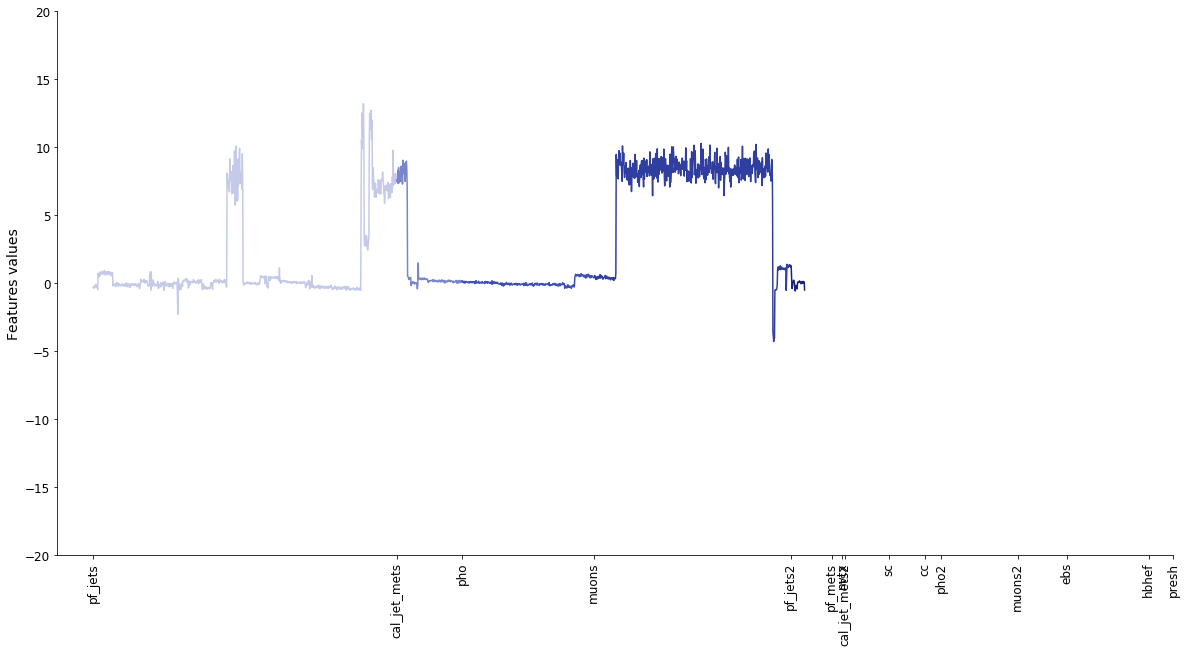

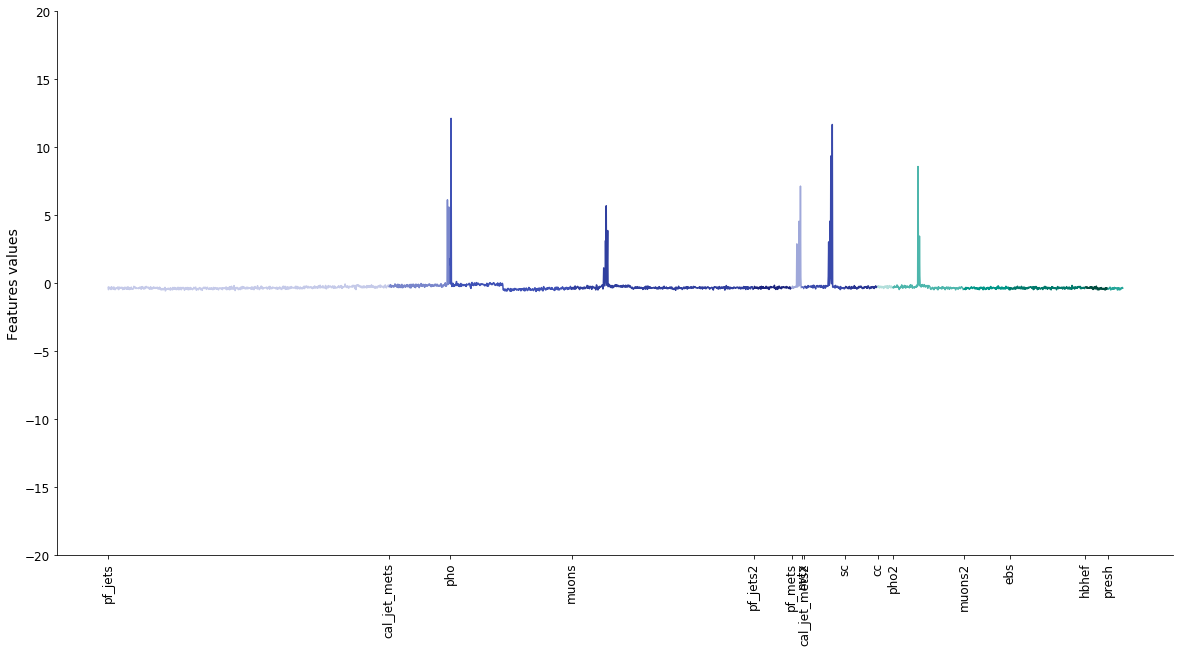

In [56]:
# Choose lumisection
INDEX_GOOD = 0
INDEX_BAD = 0

plot_over_features(X_bad[INDEX_BAD], "Features values")
plot_over_features(X_good[INDEX_GOOD], "Features values")

In [57]:
def pred_vs_feature(y_val, x_val, y_class, y_name="", x_name="", selected=[], linear=False,
                    limit=False):
    '''
    Plots two arbitrary values agains each other.
    '''
    df = pd.DataFrame({'y_val': y_val,
                       'x_val': x_val,
                       'y_class': y_class})

    groups = df.groupby('y_class')
    fig, ax = plt.subplots()

    for name, group in groups:
        ax.plot(group.x_val, 
                group.y_val,
                color="red" if name == 1 else "blue",
                marker='o',
                ms=2,
                linestyle='',
                label= "Anomaly" if name == 1 else "Normal")

    for i in selected:
        ax.plot(x_val[i],
                y_val[i],
                color="green",
                marker='o',
                ms=4,
                linestyle='')
                 
    ax.legend()
    if not linear:
        ax.set_yscale('log')
    if limit:
        plt.xlim([limit[0], limit[1]])
    plt.grid()
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    plt.show()

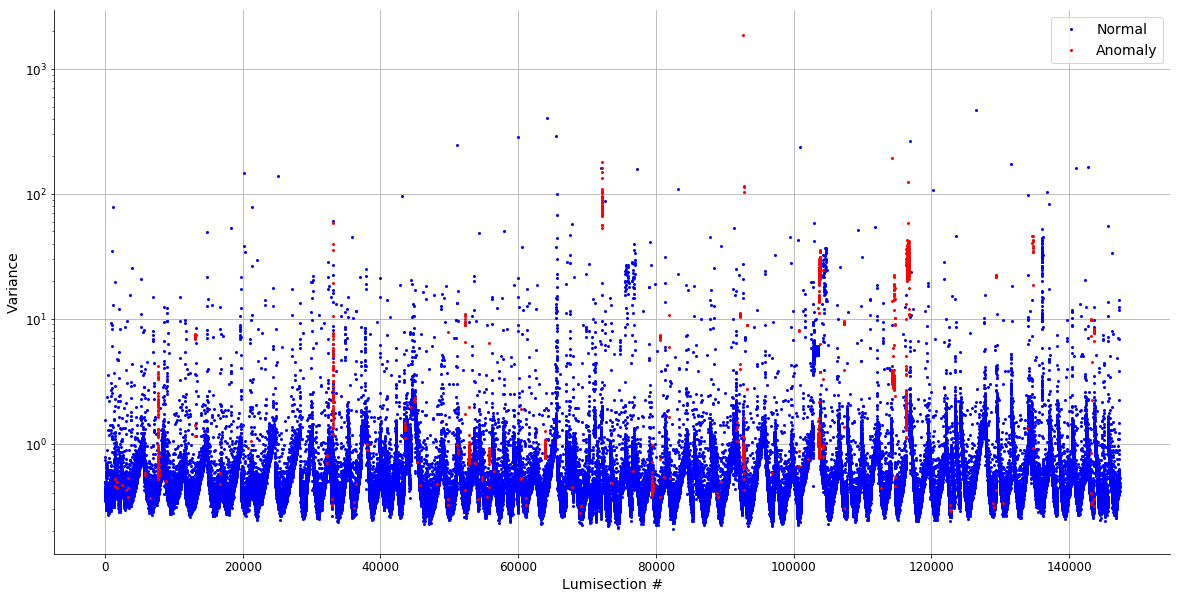

In [58]:
pred_vs_feature(variance, range(len(y)), y, y_name='Variance', x_name='Lumisection #')